                                        Prepared by: Sarit Maitra

In [1]:
!pip install pyforest
from pyforest import *
import datetime, pickle, copy, warnings
from pandas import DataFrame, merge, concat
import glob
plt.style.use('dark_background')

<IPython.core.display.Javascript object>

## 1.1 Data ingestion:
### 1.1.1 E-mini S&P 500 Futures (ES) data:

In [2]:
path = r'D:\Users\Desktop\Al\ES' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d1 = pd.concat(li, axis=0, ignore_index=True)
d1.rename(columns = {'close': 'es'}, inplace = True)
d1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,es,num_contracts_G,count_G,num_contracts_P,count_P
0,2020-05-01 00:00:00,2874.500,2877.125,2874.000,2877.125,295.0,134.0,164.0,73.0
1,2020-05-01 00:01:00,2877.250,2877.625,2875.125,2875.375,317.0,122.0,281.0,131.0
2,2020-05-01 00:02:00,2875.375,2875.375,2873.375,2874.625,104.0,59.0,137.0,64.0
3,2020-05-01 00:03:00,2874.625,2875.125,2874.125,2874.125,85.0,46.0,120.0,58.0
4,2020-05-01 00:04:00,2874.125,2875.375,2873.125,2875.250,148.0,65.0,108.0,51.0
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,3027.000,3027.250,3027.000,3027.250,98.0,30.0,135.0,50.0
29341,2020-05-29 20:57:00,3027.250,3027.250,3027.000,3027.250,82.0,25.0,119.0,33.0
29342,2020-05-29 20:58:00,3027.250,3027.375,3027.125,3027.250,157.0,42.0,135.0,39.0
29343,2020-05-29 20:59:00,3027.250,3027.500,3027.250,3027.250,210.0,92.0,478.0,68.0


In [3]:
#d1 = d1.set_index('timestamp')
d1 = d1[['timestamp', 'es']]
print(d1); print();
print('*********************')
# missing data
print('Missing data:')
print(d1.isnull().sum())

                 timestamp        es
0      2020-05-01 00:00:00  2877.125
1      2020-05-01 00:01:00  2875.375
2      2020-05-01 00:02:00  2874.625
3      2020-05-01 00:03:00  2874.125
4      2020-05-01 00:04:00  2875.250
...                    ...       ...
29340  2020-05-29 20:56:00  3027.250
29341  2020-05-29 20:57:00  3027.250
29342  2020-05-29 20:58:00  3027.250
29343  2020-05-29 20:59:00  3027.250
29344  2020-05-29 21:00:00  3027.250

[29345 rows x 2 columns]

*********************
Missing data:
timestamp       0
es           1365
dtype: int64


### 1.1.2 EURUSD data

In [4]:
path = r'D:\Users\Desktop\Al\EURUSD' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d2 = pd.concat(li, axis=0, ignore_index=True)
d2.rename(columns = {'close': 'eur_usd'}, inplace = True)
d2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,eur_usd,amount_G,count_G,amount_P,count_P
0,2020-05-01 00:00:00,1094415.0,1094485.0,1094315.0,1094465.0,NaN,NaN,NaN,NaN
1,2020-05-01 00:01:00,1094485.0,1094535.0,1094190.0,1094215.0,1.0,1.0,NaN,NaN
2,2020-05-01 00:02:00,1094235.0,1094290.0,1094115.0,1094165.0,0.0,0.0,NaN,NaN
3,2020-05-01 00:03:00,1094140.0,1094165.0,1094065.0,1094115.0,0.0,0.0,NaN,NaN
4,2020-05-01 00:04:00,1094160.0,1094265.0,1094160.0,1094190.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,1110645.0,1116390.0,1110380.0,1111740.0,NaN,NaN,1.0,1.0
29341,2020-05-29 20:57:00,1111750.0,1116400.0,1111750.0,1111750.0,NaN,NaN,NaN,NaN
29342,2020-05-29 20:58:00,1111650.0,1111650.0,1111650.0,1111650.0,NaN,NaN,NaN,NaN
29343,2020-05-29 20:59:00,1111250.0,1116400.0,1111250.0,1113400.0,NaN,NaN,NaN,NaN


In [5]:
#d2 = d2.set_index('timestamp')
d2 = d2[['timestamp', 'eur_usd']]
print(d2); print();
print('*********************')
# missing data
print('Missing data:')
d2.isnull().sum()

                 timestamp    eur_usd
0      2020-05-01 00:00:00  1094465.0
1      2020-05-01 00:01:00  1094215.0
2      2020-05-01 00:02:00  1094165.0
3      2020-05-01 00:03:00  1094115.0
4      2020-05-01 00:04:00  1094190.0
...                    ...        ...
29340  2020-05-29 20:56:00  1111740.0
29341  2020-05-29 20:57:00  1111750.0
29342  2020-05-29 20:58:00  1111650.0
29343  2020-05-29 20:59:00  1113400.0
29344  2020-05-29 21:00:00        NaN

[29345 rows x 2 columns]

*********************
Missing data:


timestamp       0
eur_usd      1249
dtype: int64

### 1.1.3 GBPUSD data

In [6]:
path = r'D:\Users\Desktop\Al\GBPUSD' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d3 = pd.concat(li, axis=0, ignore_index=True)
d3.rename(columns = {'close': 'gbp_usd'}, inplace = True)
d3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,gbp_usd,amount_G,count_G,amount_P,count_P
0,2020-05-01 00:00:00,1258070.0,1258205.0,1257990.0,1258140.0,NaN,NaN,NaN,NaN
1,2020-05-01 00:01:00,1258090.0,1258235.0,1257840.0,1257935.0,NaN,NaN,2.0,2.0
2,2020-05-01 00:02:00,1257915.0,1257915.0,1257735.0,1257765.0,NaN,NaN,0.0,0.0
3,2020-05-01 00:03:00,1257735.0,1257765.0,1257515.0,1257565.0,NaN,NaN,0.0,0.0
4,2020-05-01 00:04:00,1257580.0,1257835.0,1257530.0,1257535.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,1235010.0,1235400.0,1234550.0,1235400.0,NaN,NaN,NaN,NaN
29341,2020-05-29 20:57:00,1235450.0,1235450.0,1235450.0,1235450.0,NaN,NaN,NaN,NaN
29342,2020-05-29 20:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29343,2020-05-29 20:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#d3 = d3.set_index('timestamp')
d3 = d3[['timestamp', 'gbp_usd']]
print(d3); print();
print('*********************')
# missing data
print('Missing data:')
d3.isnull().sum()

                 timestamp    gbp_usd
0      2020-05-01 00:00:00  1258140.0
1      2020-05-01 00:01:00  1257935.0
2      2020-05-01 00:02:00  1257765.0
3      2020-05-01 00:03:00  1257565.0
4      2020-05-01 00:04:00  1257535.0
...                    ...        ...
29340  2020-05-29 20:56:00  1235400.0
29341  2020-05-29 20:57:00  1235450.0
29342  2020-05-29 20:58:00        NaN
29343  2020-05-29 20:59:00        NaN
29344  2020-05-29 21:00:00  1237150.0

[29345 rows x 2 columns]

*********************
Missing data:


timestamp       0
gbp_usd      1450
dtype: int64

### 1.1.4 Gold (GC) data

In [8]:
path = r'D:\Users\Desktop\Al\GC' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d4 = pd.concat(li, axis=0, ignore_index=True)
d4.rename(columns = {'close': 'gc'}, inplace = True)
d4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,gc,num_contracts_G,count_G,num_contracts_P,count_P
0,2020-05-01 00:00:00,1695.80,1695.90,1693.50,1695.85,26.0,24.0,19.0,14.0
1,2020-05-01 00:01:00,1695.85,1696.50,1695.35,1695.60,29.0,21.0,62.0,41.0
2,2020-05-01 00:02:00,1695.65,1695.90,1695.25,1695.65,7.0,3.0,12.0,10.0
3,2020-05-01 00:03:00,1695.70,1695.75,1695.25,1695.40,2.0,2.0,13.0,11.0
4,2020-05-01 00:04:00,1695.35,1695.45,1694.75,1694.85,17.0,16.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...
29339,2020-05-29 20:56:00,1731.55,1731.65,1731.50,1731.50,NaN,NaN,NaN,NaN
29340,2020-05-29 20:57:00,1731.50,1731.50,1731.20,1731.20,NaN,NaN,NaN,NaN
29341,2020-05-29 20:58:00,1731.20,1731.50,1731.05,1731.45,NaN,NaN,NaN,NaN
29342,2020-05-29 20:59:00,1731.50,1731.60,1731.30,1731.30,NaN,NaN,NaN,NaN


In [9]:
#d4 = d4.set_index('timestamp')
d4 = d4[['timestamp', 'gc']]
print(d4); print();
print('*********************')
# missing data
print('Missing data:')
d4.isnull().sum()

                 timestamp       gc
0      2020-05-01 00:00:00  1695.85
1      2020-05-01 00:01:00  1695.60
2      2020-05-01 00:02:00  1695.65
3      2020-05-01 00:03:00  1695.40
4      2020-05-01 00:04:00  1694.85
...                    ...      ...
29339  2020-05-29 20:56:00  1731.50
29340  2020-05-29 20:57:00  1731.20
29341  2020-05-29 20:58:00  1731.45
29342  2020-05-29 20:59:00  1731.30
29343  2020-05-29 21:00:00  1731.35

[29344 rows x 2 columns]

*********************
Missing data:


timestamp     0
gc           15
dtype: int64

### 1.1.5 E-Mini Nasdaq 100 (NQ) data

In [10]:
path = r'D:\Users\Desktop\Al\NQ' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d5 = pd.concat(li, axis=0, ignore_index=True)
d5.rename(columns = {'close': 'nq'}, inplace = True)
d5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,nq,num_contracts_G,count_G,num_contracts_P,count_P
0,2020-05-01 00:00:00,8838.500,8846.125,8838.125,8846.125,109.0,90.0,92.0,79.0
1,2020-05-01 00:01:00,8846.250,8847.375,8840.250,8841.250,59.0,51.0,95.0,71.0
2,2020-05-01 00:02:00,8841.125,8841.375,8835.875,8837.750,29.0,28.0,29.0,28.0
3,2020-05-01 00:03:00,8837.875,8839.625,8836.000,8836.750,26.0,25.0,27.0,20.0
4,2020-05-01 00:04:00,8836.625,8841.375,8834.250,8841.125,32.0,29.0,25.0,22.0
...,...,...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,9587.875,9589.125,9587.875,9588.625,12.0,8.0,18.0,17.0
29341,2020-05-29 20:57:00,9588.625,9589.500,9587.875,9588.500,11.0,5.0,8.0,8.0
29342,2020-05-29 20:58:00,9588.500,9589.375,9588.250,9588.625,15.0,12.0,14.0,13.0
29343,2020-05-29 20:59:00,9588.625,9589.375,9587.000,9587.375,58.0,32.0,42.0,21.0


In [11]:
# d5 = d5.set_index('timestamp')
d5 = d5[['timestamp', 'nq']]
print(d5); print();
print('*********************')
# missing data
print('Missing data:')
d5.isnull().sum()

                 timestamp        nq
0      2020-05-01 00:00:00  8846.125
1      2020-05-01 00:01:00  8841.250
2      2020-05-01 00:02:00  8837.750
3      2020-05-01 00:03:00  8836.750
4      2020-05-01 00:04:00  8841.125
...                    ...       ...
29340  2020-05-29 20:56:00  9588.625
29341  2020-05-29 20:57:00  9588.500
29342  2020-05-29 20:58:00  9588.625
29343  2020-05-29 20:59:00  9587.375
29344  2020-05-29 21:00:00  9591.125

[29345 rows x 2 columns]

*********************
Missing data:


timestamp       0
nq           1568
dtype: int64

### 1.1.6 USDJPY data

In [12]:
path = r'D:\Users\Desktop\Al\USDJPY' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

d6 = concat(li, axis=0, ignore_index=True)
d6.rename(columns = {'close': 'usd_jpy'}, inplace = True)
d6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,open,high,low,usd_jpy,amount_G,count_G,amount_P,count_P
0,2020-05-01 00:00:00,107278500.0,107308000.0,107276500.0,107301000.0,3.0,3.0,NaN,NaN
1,2020-05-01 00:01:00,107300500.0,107371000.0,107300500.0,107368000.0,18.0,18.0,2.0,2.0
2,2020-05-01 00:02:00,107370000.0,107396000.0,107358500.0,107376500.0,11.0,11.0,4.0,4.0
3,2020-05-01 00:03:00,107378500.0,107403000.0,107372000.0,107381500.0,20.0,20.0,7.0,7.0
4,2020-05-01 00:04:00,107380000.0,107387500.0,107359500.0,107376500.0,2.0,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
29336,2020-05-29 20:56:00,107768500.0,107809000.0,106807500.0,107675000.0,NaN,NaN,NaN,NaN
29337,2020-05-29 20:57:00,107830000.0,107830000.0,107830000.0,107830000.0,NaN,NaN,NaN,NaN
29338,2020-05-29 20:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29339,2020-05-29 20:59:00,107835000.0,107835000.0,107835000.0,107835000.0,NaN,NaN,NaN,NaN


In [13]:
# saving final data set
d6.to_csv("USDJPY.csv")

In [14]:
# d6 = d6.set_index('timestamp')
d6 = d6[['timestamp', 'usd_jpy']]
print(d6); print();
print('*********************')
# missing data
print('Missing data:')
d6.isnull().sum()

                 timestamp      usd_jpy
0      2020-05-01 00:00:00  107301000.0
1      2020-05-01 00:01:00  107368000.0
2      2020-05-01 00:02:00  107376500.0
3      2020-05-01 00:03:00  107381500.0
4      2020-05-01 00:04:00  107376500.0
...                    ...          ...
29336  2020-05-29 20:56:00  107675000.0
29337  2020-05-29 20:57:00  107830000.0
29338  2020-05-29 20:58:00          NaN
29339  2020-05-29 20:59:00  107835000.0
29340  2020-05-29 21:00:00          NaN

[29341 rows x 2 columns]

*********************
Missing data:


timestamp       0
usd_jpy      1077
dtype: int64

In [15]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29345 entries, 0 to 29344
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  29345 non-null  object 
 1   es         27980 non-null  float64
dtypes: float64(1), object(1)
memory usage: 458.6+ KB


## 2.1 Full Outer Join
- FULL OUTER JOIN combines the results of both the left and the right outer joins. 
- Joined DataFrame will contain all records from both the DataFrames and fill in NaNs for missing matches on either side. 

In [16]:
df1 = merge(d1, d2, on='timestamp', how='outer')
df2 = pd.merge(df1, d3, on='timestamp', how='outer')
df3 = pd.merge(df2, d4, on='timestamp', how='outer')
df4 = pd.merge(df3, d5, on='timestamp', how='outer')
df = pd.merge(df4, d6, on='timestamp', how='outer')
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,timestamp,es,eur_usd,gbp_usd,gc,nq,usd_jpy
0,2020-05-01 00:00:00,2877.125,1094465.0,1258140.0,1695.85,8846.125,107301000.0
1,2020-05-01 00:01:00,2875.375,1094215.0,1257935.0,1695.60,8841.250,107368000.0
2,2020-05-01 00:02:00,2874.625,1094165.0,1257765.0,1695.65,8837.750,107376500.0
3,2020-05-01 00:03:00,2874.125,1094115.0,1257565.0,1695.40,8836.750,107381500.0
4,2020-05-01 00:04:00,2875.250,1094190.0,1257535.0,1694.85,8841.125,107376500.0
...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,3027.250,1111740.0,1235400.0,1731.50,9588.625,107675000.0
29341,2020-05-29 20:57:00,3027.250,1111750.0,1235450.0,1731.20,9588.500,107830000.0
29342,2020-05-29 20:58:00,3027.250,1111650.0,NaN,1731.45,9588.625,NaN
29343,2020-05-29 20:59:00,3027.250,1113400.0,NaN,1731.30,9587.375,107835000.0


In [17]:
df.isnull().sum()

timestamp       0
es           1365
eur_usd      1249
gbp_usd      1450
gc             16
nq           1568
usd_jpy      1081
dtype: int64

In [18]:
# Filling missing values using forward and backward fill 
df = df.fillna(method='ffill').fillna(method='bfill')
print(df.isna().sum())

timestamp    0
es           0
eur_usd      0
gbp_usd      0
gc           0
nq           0
usd_jpy      0
dtype: int64


In [19]:
df

,timestamp,es,eur_usd,gbp_usd,gc,nq,usd_jpy
0,2020-05-01 00:00:00,2877.125,1094465.0,1258140.0,1695.85,8846.125,107301000.0
1,2020-05-01 00:01:00,2875.375,1094215.0,1257935.0,1695.60,8841.250,107368000.0
2,2020-05-01 00:02:00,2874.625,1094165.0,1257765.0,1695.65,8837.750,107376500.0
3,2020-05-01 00:03:00,2874.125,1094115.0,1257565.0,1695.40,8836.750,107381500.0
4,2020-05-01 00:04:00,2875.250,1094190.0,1257535.0,1694.85,8841.125,107376500.0
...,...,...,...,...,...,...,...
29340,2020-05-29 20:56:00,3027.250,1111740.0,1235400.0,1731.50,9588.625,107675000.0
29341,2020-05-29 20:57:00,3027.250,1111750.0,1235450.0,1731.20,9588.500,107830000.0
29342,2020-05-29 20:58:00,3027.250,1111650.0,1235450.0,1731.45,9588.625,107830000.0
29343,2020-05-29 20:59:00,3027.250,1113400.0,1235450.0,1731.30,9587.375,107835000.0


In [20]:
# saving final data set
df.to_csv("AL_final_data.csv")

In [21]:
df.describe()

,es,eur_usd,gbp_usd,gc,nq,usd_jpy
count,29345.000000,2.934500e+04,2.934500e+04,29345.000000,29345.000000,2.934500e+04
mean,2915.071021,1.090106e+06,1.229982e+06,1721.166400,9207.187511,1.072099e+08
std,70.365850,8.343410e+03,1.028519e+04,19.106965,241.112185,5.058159e+05
min,2761.625000,1.076660e+06,1.208510e+06,1676.500000,8563.750000,1.037500e+08
25%,2853.875000,1.082605e+06,1.221710e+06,1706.550000,9016.500000,1.068335e+08
50%,2916.875000,1.089900e+06,1.228400e+06,1720.000000,9265.125000,1.073120e+08
75%,2963.375000,1.095825e+06,1.236420e+06,1734.750000,9410.000000,1.076470e+08
max,3064.375000,1.114440e+06,1.258140e+06,1774.850000,9601.875000,1.120175e+08


<IPython.core.display.Javascript object>

Text(0.5, 0, 'GBPUSD')

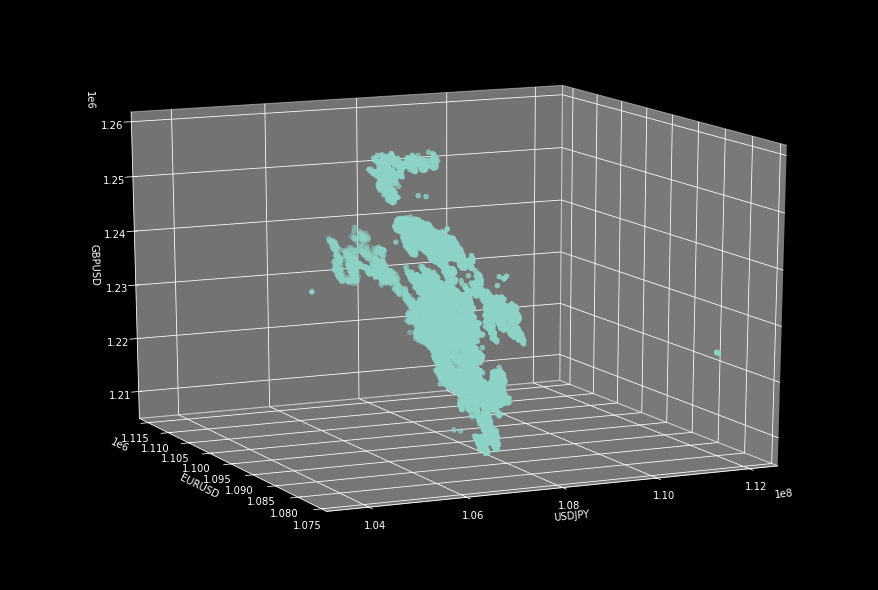

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)
ax.scatter(df["usd_jpy"], df["eur_usd"], df["gbp_usd"])
ax.set_xlabel("USDJPY")
ax.set_ylabel("EURUSD")
ax.set_zlabel("GBPUSD")

In [23]:
import statsmodels.tsa.api as smt
import pickle

I will construct a set of continuously compounded % returns called 'ret_eur', 'ret_gbp', and 'ret_jpy' using a custom function LogDiff. These new variables are saved in a workfile currency.pickle for the future usage.

The VAR class assumes that the passed time series are stationary. Here transformed non-stationary or trending data by first-differencing to be stationary. 

For direct analysis of non-stationary time series, a standard stable VAR(p) model is not appropriate.

In [24]:
data = df[['eur_usd', 'gbp_usd','usd_jpy', 'gc', 'nq', 'es']]

## Stationarity check:

In [25]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "eur_usd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.1314
 No. Lags Chosen       = 8
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.9462. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "gbp_usd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6719
 No. Lags Chosen       = 8
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.079. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "usd_jpy" 
    -----------------------------------------------
 Null Hypothesis: Data has

The null hypothesis of the ADF test states that the time series is not stationary. With a p-value of > 0.05 (the test statistic larger than the critical value for the selected confidence level), we have no reason to reject the null hypothesis,
meaning that we can conclude that the series is not stationary.

To extract maximum information from our data, it is important to have a normal or Gaussian distribution of the data. To check for that, we have done a normality test based on the Null and Alternate Hypothesis intuition.

In [26]:
from statsmodels.tsa.stattools import kpss
def kpss_test(x, h0_type='c'):
    indices = ['Test Statistic', 'p-value', '# of Lags']
    kpss_test = kpss(x, regression=h0_type)
    results = pd.Series(kpss_test[0:3], index=indices)
    for key, value in kpss_test[3].items():
        results[f'Critical Value ({key})'] = value
        return results

print('KPSS-EURUSD:')
print(kpss_test(df.eur_usd))
print('___________________')
print('KPSS-GBPUSD:')
print(kpss_test(df.gbp_usd))
print('___________________')
print('KPSS-USDJPY:')
print(kpss_test(df.usd_jpy))
print('___________________')
print('KPSS-GC:')
print(kpss_test(df.gc))
print('___________________')
print('KPSS-NQ:')
print(kpss_test(df.nq))
print('___________________')
print('KPSS-ES:')
print(kpss_test(df.es))


KPSS-EURUSD:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          27.34458
p-value                  0.01000
# of Lags               50.00000
Critical Value (10%)     0.34700
dtype: float64
___________________
KPSS-GBPUSD:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          29.572051
p-value                  0.010000
# of Lags               50.000000
Critical Value (10%)     0.347000
dtype: float64
___________________
KPSS-USDJPY:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          39.585885
p-value                  0.010000
# of Lags               50.000000
Critical Value (10%)     0.347000
dtype: float64
___________________
KPSS-GC:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          15.652439
p-value                  0.010000
# of Lags               50.000000
Critical Value (10%)     0.347000
dtype: float64
___________________
KPSS-NQ:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          43.884765
p-value                  0.010000
# of Lags               50.000000
Critical Value (10%)     0.347000
dtype: float64
___________________
KPSS-ES:


C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


<IPython.core.display.Javascript object>

Test Statistic          40.511121
p-value                  0.010000
# of Lags               50.000000
Critical Value (10%)     0.347000
dtype: float64


The null hypothesis of the KPSS test is that the time series is stationary. With a pvalue of 0.01 (or test statistic greater than the selected critical value), we have reasons to reject the null hypothesis in favor of the alternative one, meaning that
the series is not stationary.

In [27]:
from scipy import stats
stat,p = stats.normaltest(data.eur_usd)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
  print('EURUSD Data looks Gaussian (fail to reject H0)')
else:
  print('EURUSD Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(data.gbp_usd)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
  print('GBPUSD Data looks Gaussian (fail to reject H0)')
else:
  print('GBPUSD Data do not look Gaussian (reject H0)')
print('______________')
stat,p = stats.normaltest(data.usd_jpy)
print('Statistics=%.3f, p=%.3f' % (stat,p))
alpha = 0.05
if p > alpha:
  print('USDJPY Data looks Gaussian (fail to reject H0)')
else:
  print('USDJPY Data do not look Gaussian (reject H0)')

Statistics=1730.135, p=0.000
EURUSD Data do not look Gaussian (reject H0)
______________
Statistics=1213.219, p=0.000
GBPUSD Data do not look Gaussian (reject H0)
______________
Statistics=1714.579, p=0.000
USDJPY Data do not look Gaussian (reject H0)


In [28]:
print('EURUSD: Kurtosis of normal distribution: {}'. format(stats.kurtosis(data.eur_usd)))
print('EURUSD: Skewness of normal distribution: {}'. format(stats.skew(data.eur_usd)))
print('GBPUSD: Kurtosis of normal distribution: {}'. format(stats.kurtosis(data.gbp_usd)))
print('GBPUSD: Skewness of normal distribution: {}'. format(stats.skew(data.gbp_usd)))
print('USDJPY: Kurtosis of normal distribution: {}'. format(stats.kurtosis(data.usd_jpy)))
print('USDJPY: Skewness of normal distribution: {}'. format(stats.skew(data.usd_jpy)))

EURUSD: Kurtosis of normal distribution: -0.24795142380816637
EURUSD: Skewness of normal distribution: 0.6268226365879681
GBPUSD: Kurtosis of normal distribution: -0.3789097254009337
GBPUSD: Skewness of normal distribution: 0.4601503086221758
USDJPY: Kurtosis of normal distribution: 1.9488984116380061
USDJPY: Skewness of normal distribution: -0.28981427530311443


- This three distribution gives us some intuition about the normal distribution of our data. 
- A value close to 0 for Kurtosis indicates a Normal Distribution where asymmetrical nature is signified by a value between -0.5 and +0.5 for skewness. 
- The tails are heavier for kurtosis greater than 0 and vice versa. 
- Moderate skewness refers to the value between -1 and -0.5 or 0.5 and 1.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count    2.934500e+04
mean     1.090106e+06
std      8.343410e+03
min      1.076660e+06
25%      1.082605e+06
50%      1.089900e+06
75%      1.095825e+06
max      1.114440e+06
Name: eur_usd, dtype: float64

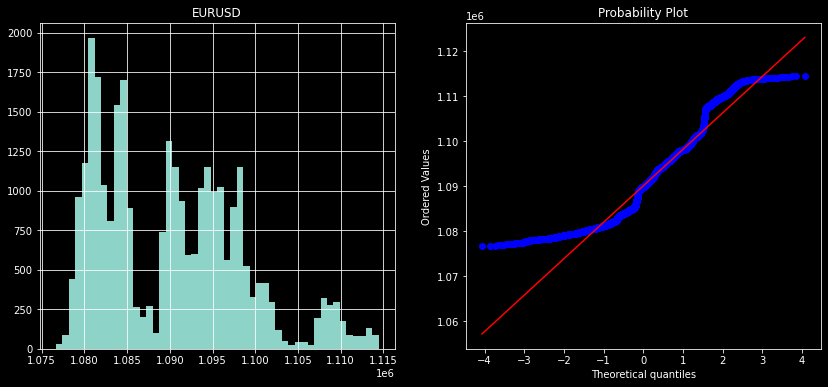

In [29]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['eur_usd'].hist(bins=50)
plt.title('EURUSD')
plt.subplot(1,2,2)
stats.probplot(data['eur_usd'], plot=plt);
data['eur_usd'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count    2.934500e+04
mean     1.229982e+06
std      1.028519e+04
min      1.208510e+06
25%      1.221710e+06
50%      1.228400e+06
75%      1.236420e+06
max      1.258140e+06
Name: gbp_usd, dtype: float64

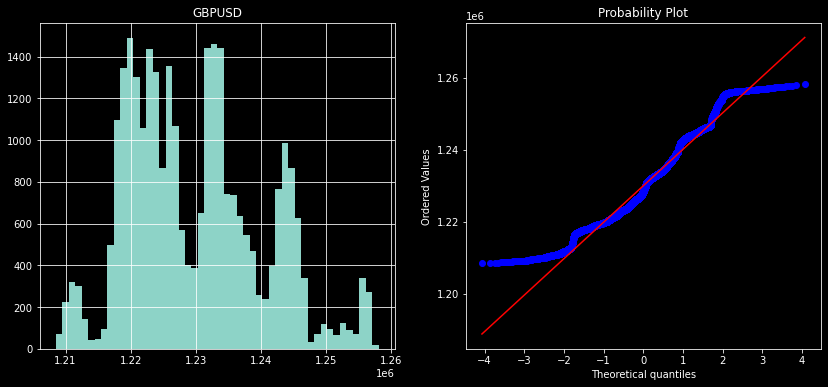

In [30]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['gbp_usd'].hist(bins=50)
plt.title('GBPUSD')
plt.subplot(1,2,2)
stats.probplot(data['gbp_usd'], plot=plt);
data['gbp_usd'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

count    2.934500e+04
mean     1.072099e+08
std      5.058159e+05
min      1.037500e+08
25%      1.068335e+08
50%      1.073120e+08
75%      1.076470e+08
max      1.120175e+08
Name: usd_jpy, dtype: float64

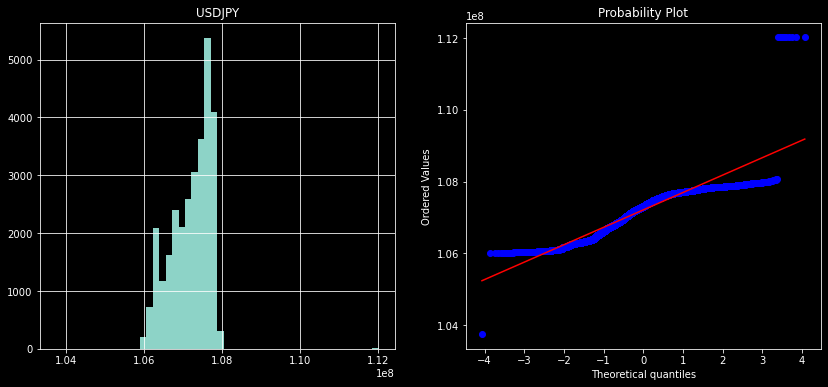

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['usd_jpy'].hist(bins=50)
plt.title('USDJPY')
plt.subplot(1,2,2)
stats.probplot(data['usd_jpy'], plot=plt);
data['usd_jpy'].describe().T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

value > 0.5 is considerred correlated, > 0.8 is highly correlated


<IPython.core.display.Javascript object>

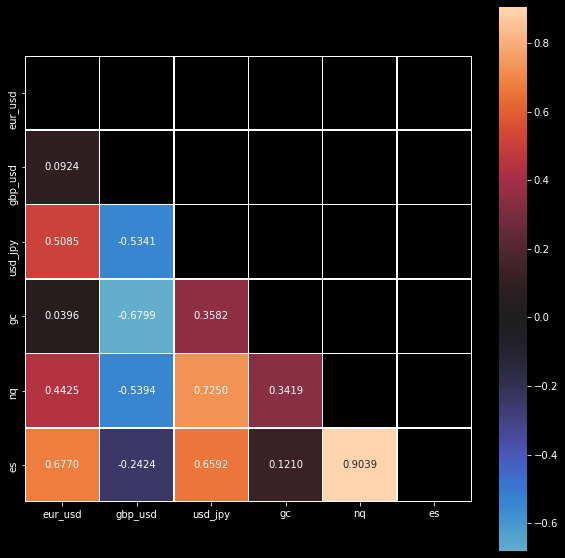

Correlation matrix:


,eur_usd,gbp_usd,usd_jpy,gc,nq,es
eur_usd,1.00,0.09,0.51,0.04,0.44,0.68
gbp_usd,0.09,1.00,-0.53,-0.68,-0.54,-0.24
usd_jpy,0.51,-0.53,1.00,0.36,0.72,0.66
gc,0.04,-0.68,0.36,1.00,0.34,0.12
nq,0.44,-0.54,0.72,0.34,1.00,0.90
es,0.68,-0.24,0.66,0.12,0.90,1.00


In [32]:
# Compute the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
print("value > 0.5 is considerred correlated, > 0.8 is highly correlated")
plt.show()

print('Correlation matrix:')
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

# Vector Auto Regression (p) processes

We are interested in modeling a T * K multivariate time series Y, where T denotes the number of observations and K the number of variables. One way of estimating relationships between the time series and their lagged values is the vector autoregression process:

- Y_t = A_1 Y_{t-1} + ...... + A_p Y_{t-p} + u_t
- u_t ~ Normal(0, Sigma_u)

here A_i is a K * K coefficient matrix.

In [33]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(d, variables, test='ssr_chi2test', verbose=False):    
    data = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in data.columns:
        for r in data.index:
            test_result = grangercausalitytests(d[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            data.loc[r, c] = min_p_value
    data.columns = [var + '_x' for var in variables]
    data.index = [var + '_y' for var in variables]
    return data

grangers_causation_matrix(data, variables = data.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,eur_usd_x,gbp_usd_x,usd_jpy_x,gc_x,nq_x,es_x
eur_usd_y,1.0000,0.0000,0.0051,0.0002,0.0000,0.0000
gbp_usd_y,0.0000,1.0000,0.0008,0.0000,0.0000,0.0000
usd_jpy_y,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000
gc_y,0.0117,0.0003,0.0000,1.0000,0.0060,0.0012
nq_y,0.0000,0.0283,0.0002,0.0095,1.0000,0.0000
es_y,0.0000,0.0035,0.0000,0.0129,0.0167,1.0000


## Testing Causation using Granger’s Causality Test
The basis behind VAR is that each of the time series in the system influences each other. That is, we can predict the series with past values of itself along with other series in the system. 

Using Granger’s Causality Test, it’s possible to test this relationship before even building the model.

- Granger’s causality tests the null hypothesis (H0) that the coefficients of past values in the regression equation is zero. 
- In simpler terms, the past values of time series (X) do not cause the other series (Y). 
- So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, we can safely reject H0

In [34]:
nobs = 30
train, test = data[0:-nobs], data[-nobs:]

# Check size
print(train.shape)  
print(test.shape)

(29315, 6)
(30, 6)


The results show only modest evidence of lead-lag interactions between the series. Granger causality test can identify whether two variables move one after the other or contemporaneously and they test includes a VAR model and an F-test to jointly test for the significance of the lags on the explanatory variables.

Since we have estimated a tri-variate VAR, three panels are displayed, with one for each dependent variable in the system.

There is causality from EUR to GBP and from JPY to GBP that is significant at the 1% level.
We also find significant causality at the 5% level from EUR to JPY and GBP to JPY, but no causality from any of the currencies to EUR.

These results might be interpreted as suggesting that information is incorporated slightly more quickly in the pound-dollar rate and yen-dollar rates than into the euro-dollar rate.

## Correcting for stationarity in transformed-data:
A major criterion in time series analysis is that the series itself is stationary. Stationary means that the key statistical properties of a time series do not change over time. A time series must be stationaryThe first hypothesis, , tests for the presence of cointegration. It is clear that since the test statistic exceeds the 1% level significantly () that we have strong evidence to reject the null hypothesis of no cointegration. The second test for  against the alternative hypothesis of  also provides clear evidence to reject  since the test statistic exceeds the 1% level significantly. The final test for  against  also provides sufficient evidence for rejecting the null hypothesis that  and so can conclude that the rank of the matrix  is greater than 2.

Thus the best estimate of the rank of the matrix is , which tells us that we need a linear combination of three time series to form a stationary series. This is to be expected, by definition of the series, as the underlying random walk utilised for all three series is non-stationary.The first hypothesis, , tests for the presence of cointegration. It is clear that since the test statistic exceeds the 1% level significantly () that we have strong evidence to reject the null hypothesis of no cointegration. The second test for  against the alternative hypothesis of  also provides clear evidence to reject  since the test statistic exceeds the 1% level significantly. The final test for  against  also provides sufficient evidence for rejecting the null hypothesis that  and so can conclude that the rank of the matrix  is greater than 2.

Thus the best estimate of the rank of the matrix is , which tells us that we need a linear combination of three time series to form a stationary series. This is to be expected, by definition of the series, as the underlying random walk utilised for all three series is non-stationary., otherwise the model would not be able to forecast it accurately.
- Natural logarithm: Making the exponential trend closer to linear
- Differencing: Taking the difference between the current observation and a lagged value (observation x time points before it) transformed data:

In [35]:
sys.float_info.max
# log transformation will lead to system error
# Skipping log transformation

<IPython.core.display.Javascript object>

1.7976931348623157e+308

- First-order differencing in a time series will remove a linear trend (i.e., differences=1).
- Second-order differencing will remove a quadratic trend (i.e., differences=2).
- In addition, first-order differencing in a time series at a lag equal to the period will remove a seasonal trend.

In [36]:
#train_log = np.log(train)
train_trans = train.diff().dropna() # differencing
train_trans

,eur_usd,gbp_usd,usd_jpy,gc,nq,es
1,-250.0,-205.0,67000.0,-0.25,-4.875,-1.750
2,-50.0,-170.0,8500.0,0.05,-3.500,-0.750
3,-50.0,-200.0,5000.0,-0.25,-1.000,-0.500
4,75.0,-30.0,-5000.0,-0.55,4.375,1.125
5,0.0,25.0,14500.0,-0.15,-0.125,-0.125
...,...,...,...,...,...,...
29310,50.0,-200.0,3000.0,-0.05,0.000,0.000
29311,-25.0,-5.0,6000.0,0.05,0.000,0.000
29312,0.0,0.0,2500.0,-0.10,0.000,0.000
29313,-380.0,-300.0,16500.0,-0.25,0.625,0.000


In [37]:
train_trans.describe()

,eur_usd,gbp_usd,usd_jpy,gc,nq,es
count,29314.000000,29314.000000,2.931400e+04,29314.000000,29314.000000,29314.000000
mean,0.531146,-0.779491,1.934229e+01,0.001245,0.024980,0.005045
std,288.799413,334.913249,4.793752e+04,0.517394,3.724413,1.119636
min,-18615.000000,-18420.000000,-4.778500e+06,-9.150000,-131.500000,-37.750000
25%,-50.000000,-100.000000,-5.500000e+03,-0.200000,-1.500000,-0.500000
50%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
75%,50.000000,100.000000,5.500000e+03,0.200000,1.625000,0.500000
max,18290.000000,17970.000000,4.752500e+06,11.950000,84.750000,26.875000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

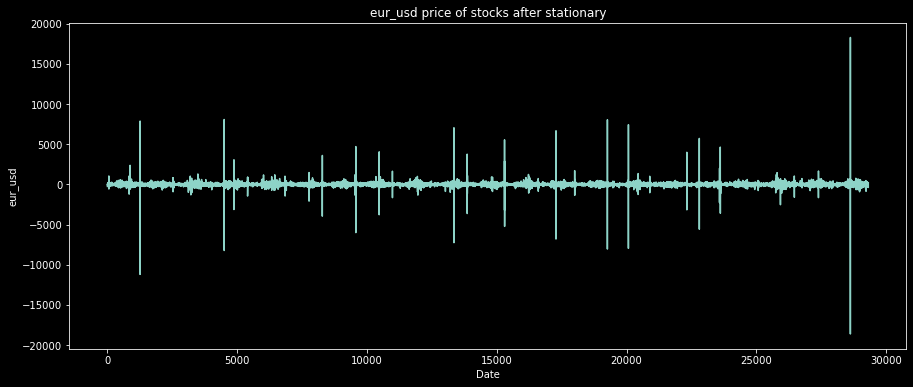

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

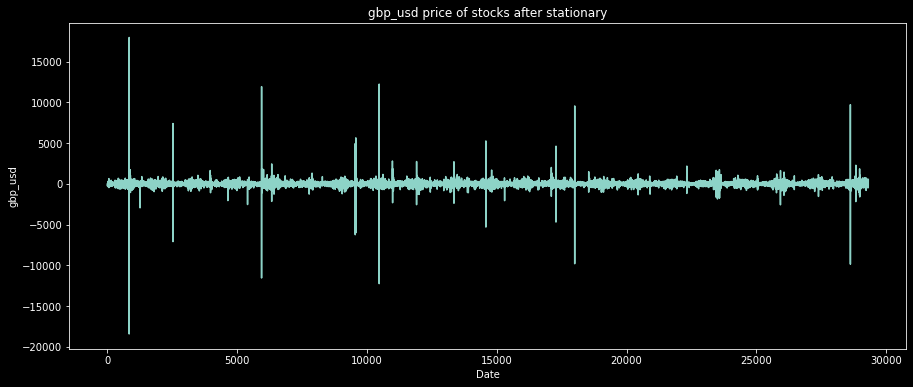

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

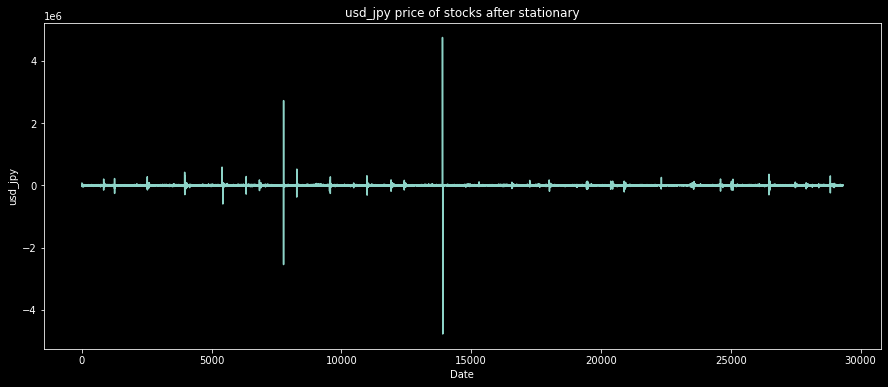

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

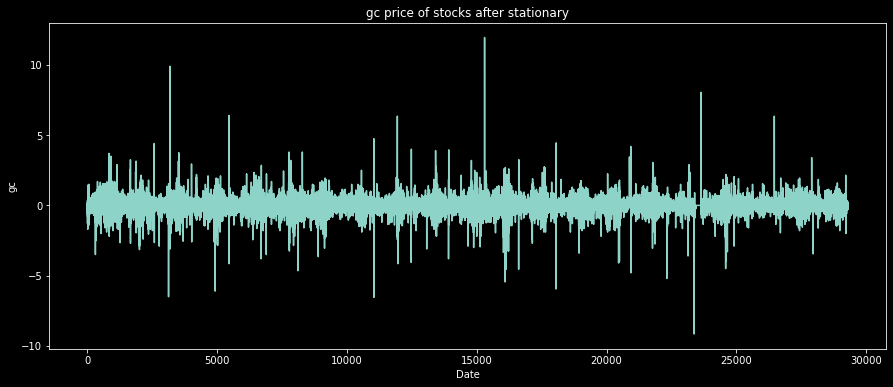

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

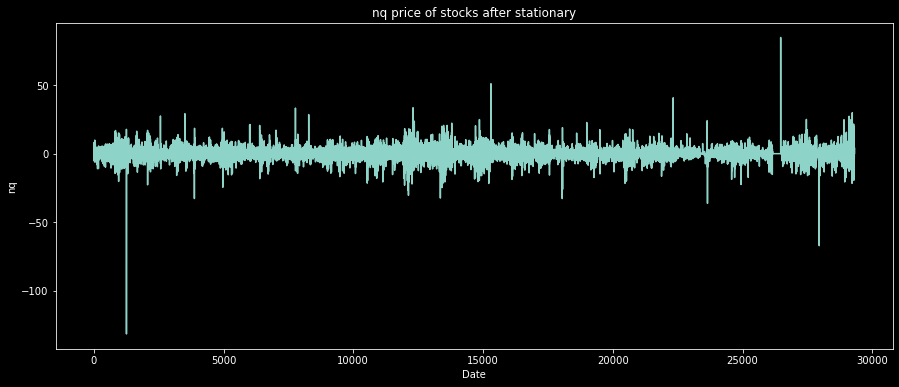

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

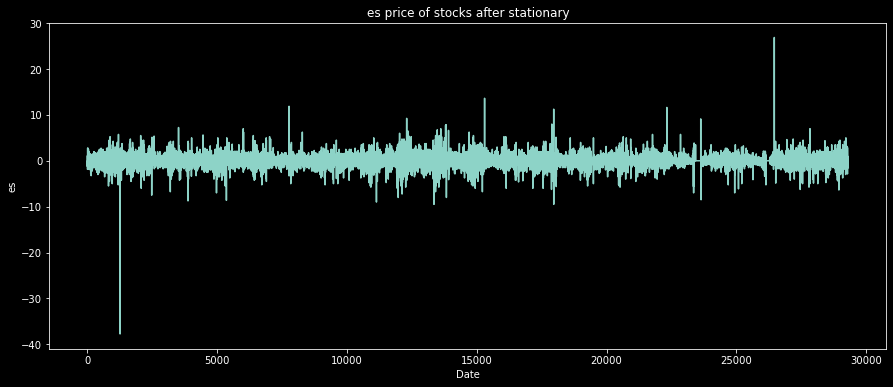

In [38]:
for c in train_trans[['eur_usd','gbp_usd','usd_jpy','gc','nq','es']]:
    train_trans[str(c)].plot(figsize=(15, 6))
    plt.xlabel("Date")
    plt.ylabel(c)
    plt.title(f"{str(c)} price of stocks after stationary")
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

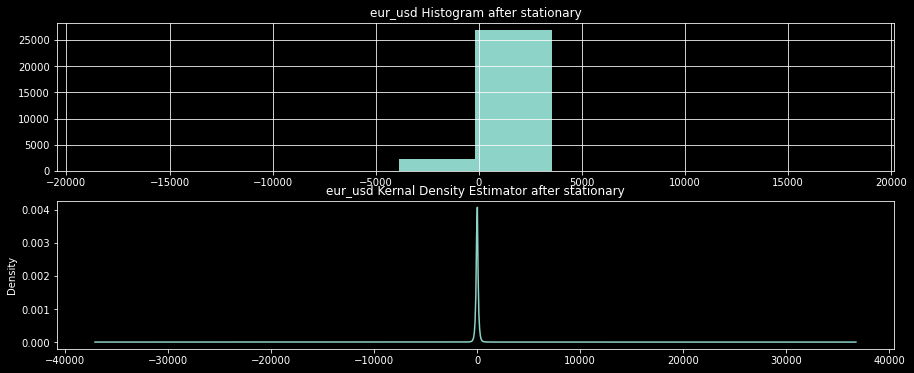

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

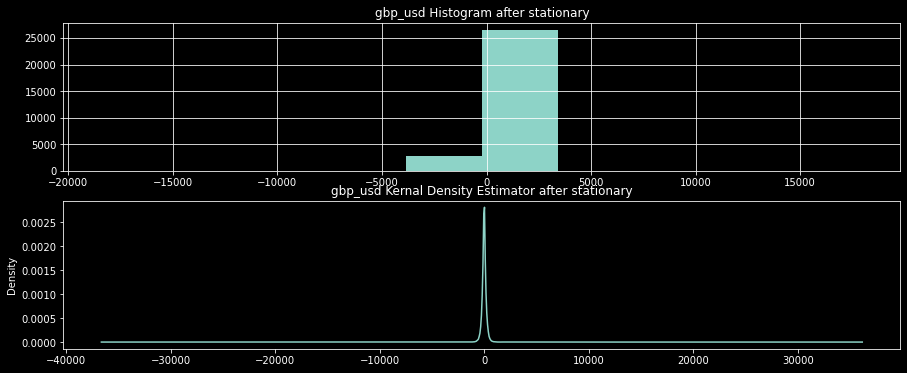

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

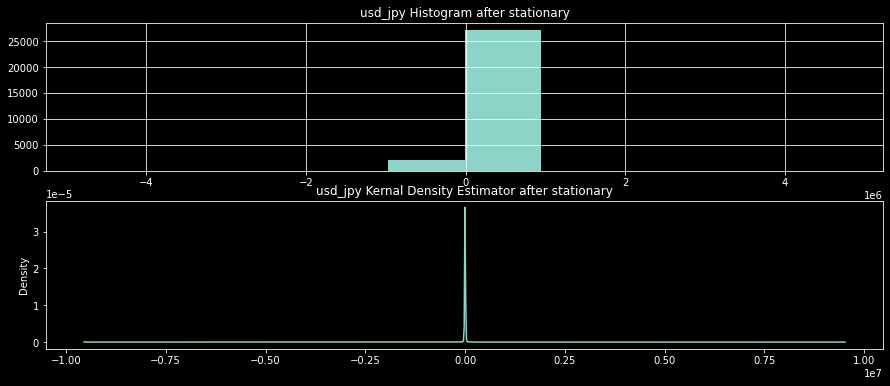

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

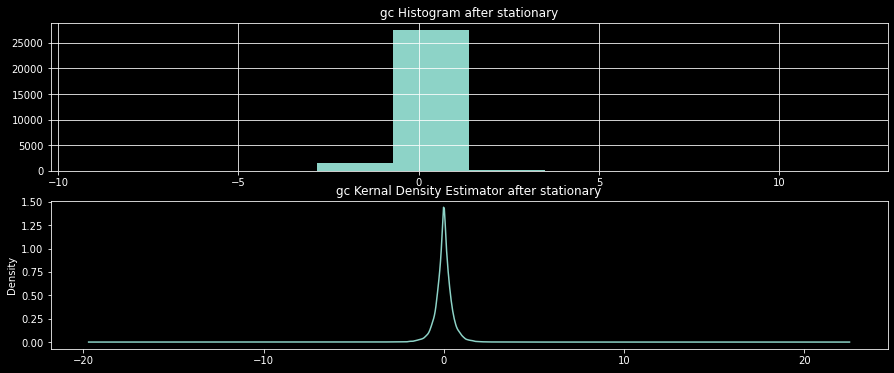

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

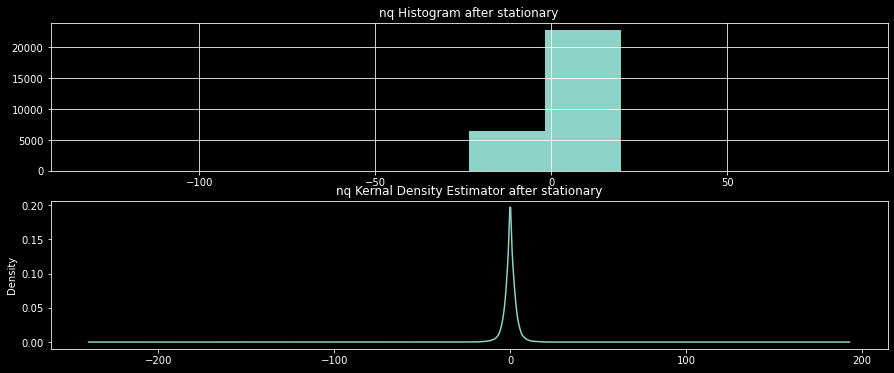

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

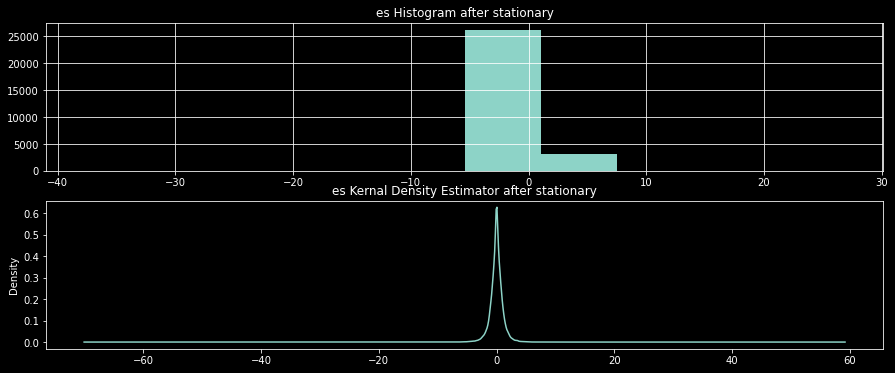

In [39]:
for c in train_trans[['eur_usd','gbp_usd','usd_jpy','gc','nq','es']]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram after stationary")
    train_trans[str(c)].hist()
    plt.subplot(212)
    train_trans[str(c)].plot(kind='kde')
    
    plt.title(f"{str(c)} Kernal Density Estimator after stationary")
    plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")
        
# ADF Test on each column
for name, column in train_trans.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "eur_usd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -71.7788
 No. Lags Chosen       = 7
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "gbp_usd" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -68.1222
 No. Lags Chosen       = 7
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "usd_jpy" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level

## Co-integration test

Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.
It is the co-movement among underlying variables over the long run. This long-run estimation feature distinguishes it from
correlation. Two or more variables are cointegrated if and only if they share common trends.

In [41]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(df):
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6):
        return str(val).ljust(length)
    print('Column Name > Test Stat > C(95%) => Signif\n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9),">", adjust(cvt, 8), ' => ' , trace > cvt)
cointegration_test(train_trans[['eur_usd','gbp_usd','usd_jpy','gc','nq','es']])

Column Name > Test Stat > C(95%) => Signif
 ----------------------------------------
eur_usd >  31877.44  > 83.9383   =>  True
gbp_usd >  24451.29  > 60.0627   =>  True
usd_jpy >  18766.63  > 40.1749   =>  True
gc     >  13746.19  > 24.2761   =>  True
nq     >  8951.75   > 12.3212   =>  True
es     >  4345.55   > 4.1296    =>  True


###### There exists presence of a long-run relationship between features.

In [42]:
# dinfining time series evaluation metrics:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true,y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [43]:
# defining custom function to inverse differencing

def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

## Lag order selection

Iteratively fitting increasing orders of VAR model to identify the order that gives a model with least AIC.

In [44]:
from statsmodels.tsa.api import VAR

model = VAR(train_trans.values)
for i in [1,2,3,4,5,6,7,8,9,11,12,13,14,15]:
    res = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', res.aic)
    print('BIC : ', res.bic)
    print('FPE : ', res.fpe)
    print('HQIC: ', res.hqic, '\n')

Lag Order = 1
AIC :  44.19836344679518
BIC :  44.210235415821536
FPE :  1.5671311893860858e+19
HQIC:  44.202176911478624 

Lag Order = 2
AIC :  44.13690852715282
BIC :  44.15895713103051
FPE :  1.4737228651896666e+19
HQIC:  44.14399089981144 

Lag Order = 3
AIC :  44.11870544967439
BIC :  44.15093129898808
FPE :  1.4471392605222908e+19
HQIC:  44.12905693706258 

Lag Order = 4
AIC :  44.11137310714577
BIC :  44.15377681253833
FPE :  1.4365671483253768e+19
HQIC:  44.12499391603819 

Lag Order = 5
AIC :  44.1087724207517
BIC :  44.1613545929242
FPE :  1.432835944865953e+19
HQIC:  44.12566275794323 

Lag Order = 6
AIC :  44.107627631177664
BIC :  44.17038888088942
FPE :  1.4311965924983001e+19
HQIC:  44.12778770348347 

Lag Order = 7
AIC :  44.10662048732594
BIC :  44.17956142539448
FPE :  1.4297559038218189e+19
HQIC:  44.130050501581415 

Lag Order = 8
AIC :  44.10643077330185
BIC :  44.18955201060295
FPE :  1.429484693470645e+19
HQIC:  44.13313093636267 

Lag Order = 9
AIC :  44.10745270

##### AIC drops to lowest at lag 8, then increases at lag 9 and then keeps increrasing. We will fo with lag 8 model.

In [45]:
model = smt.VAR(train_trans)
res = model.fit(maxlags=8)
res.summary()

C:\Users\Sarit\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Nov, 2020
Time:                     02:43:56
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    44.1896
Nobs:                     29306.0    HQIC:                   44.1331
Log likelihood:          -895498.    FPE:                1.42948e+19
AIC:                      44.1064    Det(Omega_mle):     1.41523e+19
--------------------------------------------------------------------
Results for equation eur_usd
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              1.424886         1.543882            0.923           0.356
L1.eur_usd        -0.449791         0.006004          -74.912           0.000
L1.gbp_usd         0.098894         0.005097           19.401         

- Top of the table shows the information for the model as a whole, including values of the information criteria, 
- Further down we shows the coefficient estimates and goodness-of-fit measures for each of the equations separately. 
- Each regression equation is separated by a horizontal line.

### Durbin Watson Statistic
Checking for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic. If there is any correlation left in the residuals, then, there is some pattern in the time series that is still left to be explained by the model. In that case, the typical course of action is to either increase the order of the model or induce more predictors into the system or look for a different algorithm to model the time series. So, checking for serial correlation is to ensure that the model is sufficiently able to explain the variances and patterns in the time series.


In [46]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res.resid)

for col, val in zip(data.columns, out):
    print((col), ':', round(val, 2))

eur_usd : 2.0
gbp_usd : 2.0
usd_jpy : 2.0
gc : 2.0
nq : 2.0
es : 2.0


The serial correlation looks alright. Let’s proceed with the forecast.

In [47]:
print('GBPUSD-> EURUSD')
res_causality_1 = res.test_causality(causing=['gbp_usd'], caused=['eur_usd'], kind='wald',signif=0.05 )
print(res_causality_1)
print("**********************")
print('GBPUSD-> USDJPY')
res_causality_2 = res.test_causality(causing=['gbp_usd'], caused=['usd_jpy'], kind='wald',signif=0.05 )
print(res_causality_2)
print("**********************")
print('GBPUSD -> USDJPY, EURUSD')
res_causality_3 = res.test_causality(causing=['gbp_usd'], caused=['usd_jpy', 'eur_usd'], kind='wald',signif=0.05 )
print(res_causality_3)
print("**********************")
print('EURUSD -> USDJPY')
res_causality_4 = res.test_causality(causing=['eur_usd'], caused=['usd_jpy'], kind='wald',signif=0.05 )
print(res_causality_4)
print("**********************")
print('EURUSD -> GBPUSD, USDJPY')
res_causality_5 = res.test_causality(causing=['eur_usd'], caused=['gbp_usd', 'usd_jpy'], kind='wald',signif=0.05 )
print(res_causality_4)
print("**********************")

GBPUSD-> EURUSD
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: gbp_usd does not Granger-cause eur_usd: reject at 5% significance level. Test statistic: 491.552, critical value: 15.507>, p-value: 0.000>
**********************
GBPUSD-> USDJPY
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: gbp_usd does not Granger-cause usd_jpy: fail to reject at 5% significance level. Test statistic: 5.723, critical value: 15.507>, p-value: 0.678>
**********************
GBPUSD -> USDJPY, EURUSD
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: gbp_usd does not Granger-cause [usd_jpy, eur_usd]: reject at 5% significance level. Test statistic: 495.849, critical value: 26.296>, p-value: 0.000>
**********************
EURUSD -> USDJPY
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: eur_usd does not Granger-cause usd_jpy: fail to reject at 5% significance level. Te

## Forecasting

In [48]:
#lag_order = res.k_ar
#res.forecast(train_trans.values[-lag_order:], 30)

# Get the lag order
lag_order = res.k_ar
print(lag_order) 

# Input data for forecasting
input_data = train_trans.values[-lag_order:]
print(input_data)

8
[[-2.500e+01  0.000e+00  8.500e+03 -5.000e-02  0.000e+00  0.000e+00]
 [ 1.000e+02  2.150e+02 -2.900e+04  0.000e+00  0.000e+00  0.000e+00]
 [ 5.000e+01 -4.800e+02 -1.450e+04  1.500e-01  0.000e+00  0.000e+00]
 [ 5.000e+01 -2.000e+02  3.000e+03 -5.000e-02  0.000e+00  0.000e+00]
 [-2.500e+01 -5.000e+00  6.000e+03  5.000e-02  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  2.500e+03 -1.000e-01  0.000e+00  0.000e+00]
 [-3.800e+02 -3.000e+02  1.650e+04 -2.500e-01  6.250e-01  0.000e+00]
 [ 2.050e+02  5.500e+02  4.500e+03  5.000e-02  3.875e+00 -1.500e+00]]


In [49]:
fc = res.forecast(y=train_trans.values, steps=nobs)
df_pred = pd.DataFrame(fc, columns=train.columns)
df_pred

<IPython.core.display.Javascript object>

,eur_usd,gbp_usd,usd_jpy,gc,nq,es
0,23.456543,-187.699171,-5010.084110,0.048838,-0.581428,-0.081700
1,5.369947,-7.936201,594.142419,-0.026680,0.365196,0.139918
2,-15.146435,6.007909,1096.760972,0.006680,-0.347194,-0.125265
3,0.892956,12.589896,430.091114,0.014351,0.268789,0.048499
4,7.531599,6.148057,118.775424,0.020973,0.226374,0.026398
5,-6.815397,-2.084342,-649.874746,0.034764,-0.000593,0.004227
6,-0.752597,-21.237549,-1097.372227,0.040452,0.026805,-0.007722
7,-4.727305,-7.407896,427.912115,-0.008276,0.068779,0.030253
8,0.861504,8.051205,254.350900,-0.000891,0.021085,-0.003831
9,1.961126,-2.408291,-113.657350,0.000436,0.016589,0.002536


In [50]:
# forecasting
#df_pred = res.forecast(y=input_data, steps=nobs)
#df_pred = DataFrame(pred, index=test.index, columns=test.columns)
#df_pred

### Inverting transformation

In [51]:
# inverse the differenced prediction
results = inverse_diff(train[['eur_usd','gbp_usd','usd_jpy',
                       'gc','nq','es']], df_pred)
results

,eur_usd,gbp_usd,usd_jpy,gc,nq,es,eur_usd_1st_inv_diff,gbp_usd_1st_inv_diff,usd_jpy_1st_inv_diff,gc_1st_inv_diff,nq_1st_inv_diff,es_1st_inv_diff
0,23.456543,-187.699171,-5010.084110,0.048838,-0.581428,-0.081700,1.110058e+06,1.235102e+06,1.078630e+08,1732.398838,9577.793572,3024.918300
1,5.369947,-7.936201,594.142419,-0.026680,0.365196,0.139918,1.110064e+06,1.235094e+06,1.078636e+08,1732.372158,9578.158769,3025.058218
2,-15.146435,6.007909,1096.760972,0.006680,-0.347194,-0.125265,1.110049e+06,1.235100e+06,1.078647e+08,1732.378837,9577.811575,3024.932952
3,0.892956,12.589896,430.091114,0.014351,0.268789,0.048499,1.110050e+06,1.235113e+06,1.078651e+08,1732.393188,9578.080364,3024.981451
4,7.531599,6.148057,118.775424,0.020973,0.226374,0.026398,1.110057e+06,1.235119e+06,1.078652e+08,1732.414161,9578.306738,3025.007849
5,-6.815397,-2.084342,-649.874746,0.034764,-0.000593,0.004227,1.110050e+06,1.235117e+06,1.078646e+08,1732.448925,9578.306144,3025.012076
6,-0.752597,-21.237549,-1097.372227,0.040452,0.026805,-0.007722,1.110050e+06,1.235096e+06,1.078635e+08,1732.489377,9578.332949,3025.004354
7,-4.727305,-7.407896,427.912115,-0.008276,0.068779,0.030253,1.110045e+06,1.235088e+06,1.078639e+08,1732.481101,9578.401729,3025.034606
8,0.861504,8.051205,254.350900,-0.000891,0.021085,-0.003831,1.110046e+06,1.235096e+06,1.078642e+08,1732.480209,9578.422814,3025.030775
9,1.961126,-2.408291,-113.657350,0.000436,0.016589,0.002536,1.110048e+06,1.235094e+06,1.078641e+08,1732.480645,9578.439402,3025.033311


## Evaluation metrics:

In [52]:
from sklearn import metrics

for i in ['eur_usd','gbp_usd','usd_jpy','gc','nq','es' ]:
    print(f'Evaluation metric for {i}')
    timeseries_evaluation_metrics_func(test[str(i)],
                                       results[str(i)+'_1st_inv_diff'])

Evaluation metric for eur_usd
Evaluation metric results:-
MSE is : 1222310.309797373
MSE is : 737.2135032643874


<IPython.core.display.Javascript object>

RMSE is : 1105.581435172178


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE is : 0.06631333027387716
R2 is : -0.7907299918944961

Evaluation metric for gbp_usd
Evaluation metric results:-
MSE is : 355838.5345305546
MSE is : 476.5528903846784


<IPython.core.display.Javascript object>

RMSE is : 596.5220318903189


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE is : 0.03856134093579771
R2 is : -1.4332947436852965

Evaluation metric for usd_jpy
Evaluation metric results:-
MSE is : 3441164210.0536
MSE is : 45430.04458425492


<IPython.core.display.Javascript object>

RMSE is : 58661.43716321311


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE is : 0.042144176129139406
R2 is : -0.37784965745515064

Evaluation metric for gc
Evaluation metric results:-
MSE is : 0.4218342517791368
MSE is : 0.5365835434788626


<IPython.core.display.Javascript object>

RMSE is : 0.6494876840858007


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE is : 0.03098576847458293
R2 is : -2.070118280779858

Evaluation metric for nq
Evaluation metric results:-
MSE is : 73.04720272624598
MSE is : 8.31287010495574


<IPython.core.display.Javascript object>

RMSE is : 8.546765629537644


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE is : 0.0867067505587552
R2 is : -16.92409028261688

Evaluation metric for es
Evaluation metric results:-
MSE is : 4.131805225499903
MSE is : 2.0064781127266995


<IPython.core.display.Javascript object>

RMSE is : 2.032684241464941


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MAPE is : 0.06628337959254821
R2 is : -34.82058714461085



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

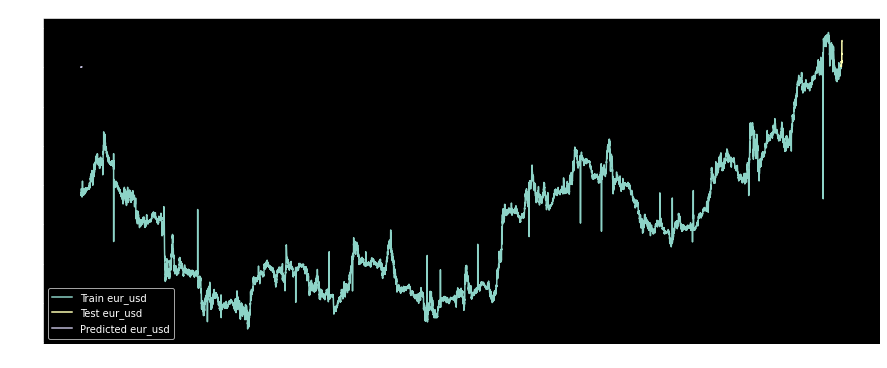

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

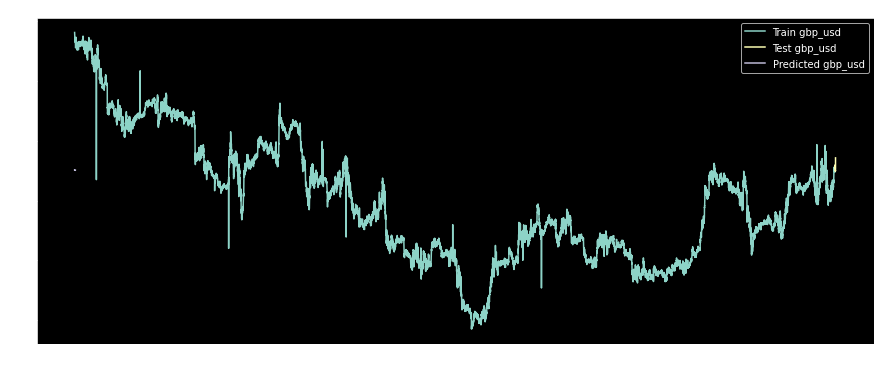

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

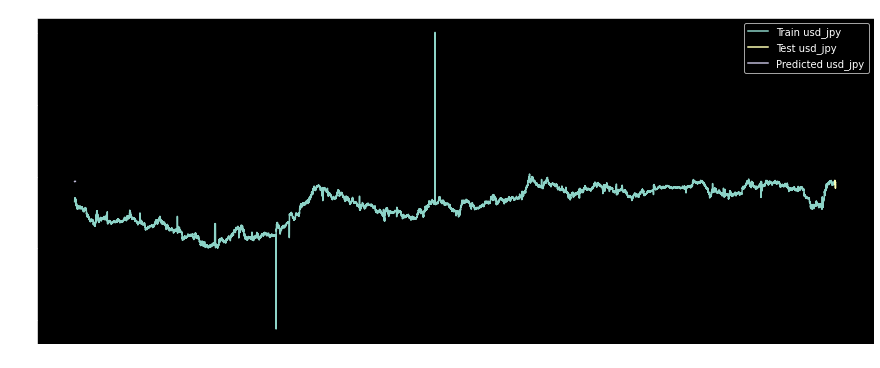

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

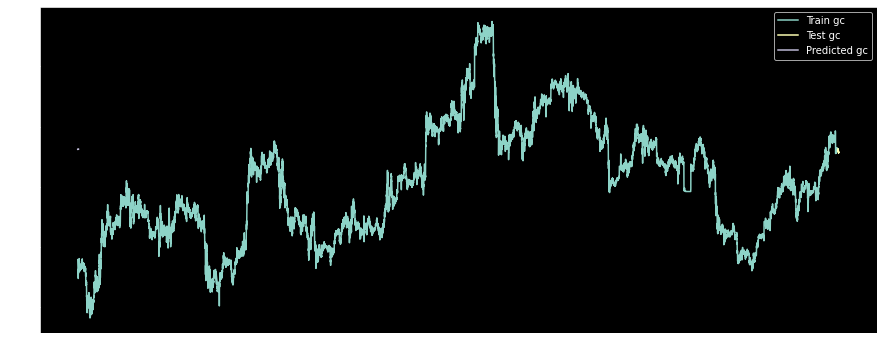

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

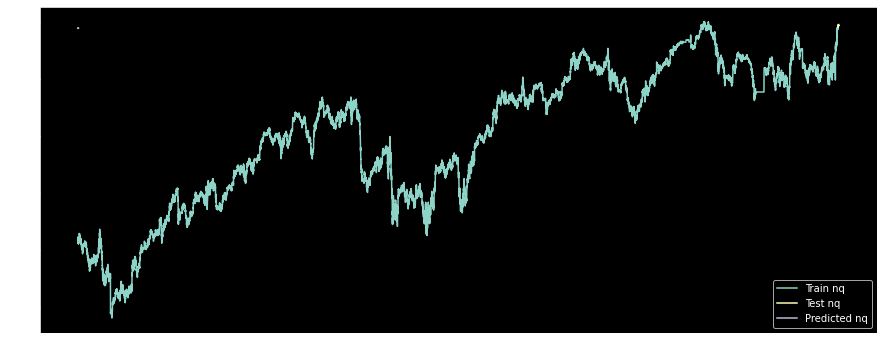

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

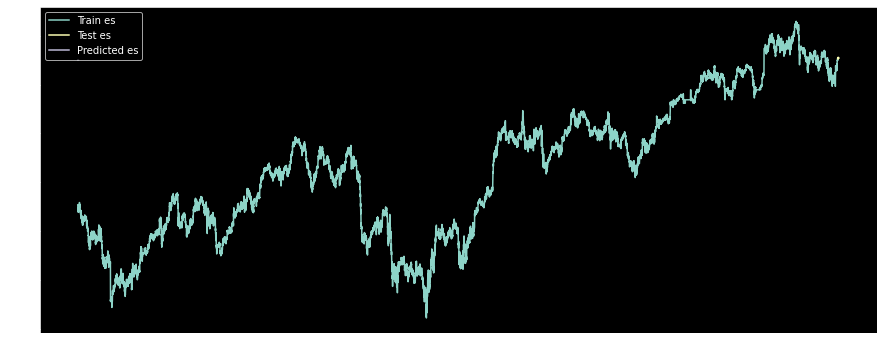

In [53]:
plt.style.use('dark_background')
get_ipython().run_line_magic('matplotlib', 'inline')
for i in ['eur_usd','gbp_usd','usd_jpy','gc','nq','es']:
    plt.rcParams["figure.figsize"] = [15,6]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(results[str(i) + '_1st_inv_diff'], label='Predicted '+ str(i))
    plt.legend(loc='best')
    plt.show()

In [54]:
var_pred = results[['eur_usd_1st_inv_diff', 'gbp_usd_1st_inv_diff', 'usd_jpy_1st_inv_diff','gc_1st_inv_diff',
                    'nq_1st_inv_diff', 'es_1st_inv_diff']]
var_pred.index = test.index
var_pred.rename(columns = {'eur_usd_1st_inv_diff': 'eur_usd_pred',
                          'gbp_usd_1st_inv_diff':'gbp_usd_pred',
                          'usd_jpy_1st_inv_diff':'usd_jpy_pred',
                          'gc_1st_inv_diff': 'gc_pred',
                          'nq_1st_inv_diff': 'nq_pred',
                          'es_1st_inv_diff':'es_pred'}, inplace = True)
var_pred

C:\Users\Sarit\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,eur_usd_pred,gbp_usd_pred,usd_jpy_pred,gc_pred,nq_pred,es_pred
29315,1.110058e+06,1.235102e+06,1.078630e+08,1732.398838,9577.793572,3024.918300
29316,1.110064e+06,1.235094e+06,1.078636e+08,1732.372158,9578.158769,3025.058218
29317,1.110049e+06,1.235100e+06,1.078647e+08,1732.378837,9577.811575,3024.932952
29318,1.110050e+06,1.235113e+06,1.078651e+08,1732.393188,9578.080364,3024.981451
29319,1.110057e+06,1.235119e+06,1.078652e+08,1732.414161,9578.306738,3025.007849
29320,1.110050e+06,1.235117e+06,1.078646e+08,1732.448925,9578.306144,3025.012076
29321,1.110050e+06,1.235096e+06,1.078635e+08,1732.489377,9578.332949,3025.004354
29322,1.110045e+06,1.235088e+06,1.078639e+08,1732.481101,9578.401729,3025.034606
29323,1.110046e+06,1.235096e+06,1.078642e+08,1732.480209,9578.422814,3025.030775
29324,1.110048e+06,1.235094e+06,1.078641e+08,1732.480645,9578.439402,3025.033311


In [55]:
combine = concat([test, var_pred], axis=1)
combine = combine[['eur_usd', 'eur_usd_pred', 'gbp_usd', 'gbp_usd_pred', 'usd_jpy', 
                   'usd_jpy_pred', 'gc', 'gc_pred', 'nq', 'nq_pred', 'es', 'es_pred']]
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

combine.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['eur_usd_pred', 'gbp_usd_pred', 'usd_jpy_pred',
                                                               'gc_pred', 'nq_pred', 'es_pred']])

<IPython.core.display.Javascript object>

,eur_usd,eur_usd_pred,gbp_usd,gbp_usd_pred,usd_jpy,usd_jpy_pred,gc,gc_pred,nq,nq_pred,es,es_pred
29315,1110135.000000,1110058.456543,1235490.000000,1235102.300829,107880000.000000,107862989.915890,1732.550000,1732.398838,9584.750000,9577.793572,3026.250000,3024.918300
29316,1110285.000000,1110063.826490,1235590.000000,1235094.364628,107891500.000000,107863584.058309,1732.500000,1732.372158,9588.500000,9578.158769,3026.750000,3025.058218
29317,1110210.000000,1110048.680056,1235590.000000,1235100.372537,107894000.000000,107864680.819281,1732.450000,1732.378837,9587.625000,9577.811575,3026.875000,3024.932952
29318,1110135.000000,1110049.573011,1235495.000000,1235112.962433,107895000.000000,107865110.910395,1732.250000,1732.393188,9587.625000,9578.080364,3026.750000,3024.981451
29319,1110135.000000,1110057.104610,1235445.000000,1235119.110489,107893500.000000,107865229.685819,1732.300000,1732.414161,9584.875000,9578.306738,3026.625000,3025.007849
29320,1110160.000000,1110050.289213,1235490.000000,1235117.026147,107892500.000000,107864579.811073,1732.200000,1732.448925,9585.750000,9578.306144,3026.625000,3025.012076
29321,1110210.000000,1110049.536616,1235490.000000,1235095.788598,107885000.000000,107863482.438846,1732.100000,1732.489377,9588.750000,9578.332949,3027.250000,3025.004354
29322,1110085.000000,1110044.809311,1235490.000000,1235088.380702,107885000.000000,107863910.350961,1732.000000,1732.481101,9587.750000,9578.401729,3027.000000,3025.034606
29323,1110185.000000,1110045.670815,1235490.000000,1235096.431907,107879500.000000,107864164.701861,1731.950000,1732.480209,9588.250000,9578.422814,3027.375000,3025.030775
29324,1110235.000000,1110047.631941,1235590.000000,1235094.023616,107868000.000000,107864051.044510,1732.000000,1732.480645,9587.500000,9578.439402,3027.500000,3025.033311


In [56]:
#from itertools import permutations
#from statsmodels.tsa.stattools import grangercausalitytests

# creates a list of tuples containing the permutations of length 2 of the stocks
#stock_perms = list(permutations(train, 13))

# loops through the list of stock permutations
#for i in range(len(stock_perms)):
    # converts the tuple to a list so it can be passed to the dataframe for column selection
    #temp_list = list(stock_perms[i])
    # creates a temporary dataframe of just the two variables
    #temp_df = train[temp_list]
    # prints which permutation is being tested for interpretability
    #print('Does a lag of ' + temp_list[1] + ' predict ' + temp_list[0])
    # prints the results of a Granger Causality test for each permutation with 1 lag
    #print(grangercausalitytests(temp_df, maxlag = 1, addconst = True, verbose = True))
    #print()

In [57]:
#import statsmodels.api as sm
#model = sm.tsa.DynamicFactor(data, k_factors=1, factor_order=2)
#results = model.fit()
#print(results.coefficients_of_determination) # [ 0.957 0.545 0.603 ]
# Because the estimated factor turned out to be inversely related to the
# three variables, we want to consider the negative of the impulse
#dfm_irfs = -results.impulse_responses(15, impulse=0, orthogonalized=True) * 100

## Forecast Error Variance Decomposition (FEVD)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

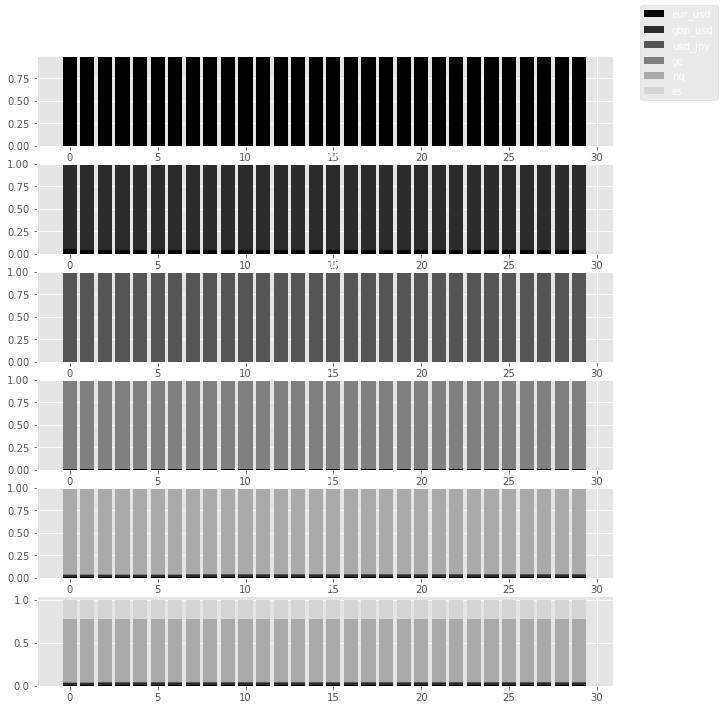

In [58]:
plt.style.use('ggplot')
fevd = res.fevd(30)
fevd.plot()
plt.show()

- Above plot shows the effect that a shock to the euro rates has on the other two rates and on later values of the euro series itself, which are shown in the first row of the FEVD plot. 
- the % of the errors that is attributable to own shocks is 100% in the case of the euro rate (dark black bar), 
- for the pound, the euro series explains 7% of the variance, 
- for the yen, the euro series explains almost negligible variation.


However ordering of the variables has an effect on the IRA and variance decompositions, and when, as in this case, theory does not suggest an obvious ordering of the series, some sensitivity analysis should be undertaken. 

- Let us assume we would like to test how sensitive the FEVDs are to a different way of ordering. 
- We first generate a new DataFrame data_1 with the reverse order of the columns to be used previously, which is ret_jpy ret_gbp ret_eur. 
- To inspect and compare the FEVDs for this ordering and the previous one, we shall create graphs of the FEVDs by implementing the VAR regression and fevd function again. We can then compare the FEVDs of the reverse order with those of the previous order

In [59]:
fevd.summary()

FEVD for eur_usd
       eur_usd   gbp_usd   usd_jpy        gc        nq        es
0     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000
1     0.986609  0.012353  0.000180  0.000177  0.000674  0.000007
2     0.986531  0.012335  0.000212  0.000224  0.000676  0.000022
3     0.986369  0.012326  0.000227  0.000234  0.000682  0.000162
4     0.986320  0.012325  0.000235  0.000240  0.000718  0.000162
5     0.986134  0.012390  0.000240  0.000268  0.000798  0.000171
6     0.985927  0.012421  0.000272  0.000406  0.000798  0.000175
7     0.985738  0.012494  0.000339  0.000410  0.000799  0.000220
8     0.985576  0.012606  0.000348  0.000409  0.000821  0.000239
9     0.985526  0.012649  0.000350  0.000412  0.000822  0.000239
10    0.985512  0.012663  0.000350  0.000413  0.000822  0.000240
11    0.985512  0.012663  0.000350  0.000413  0.000822  0.000240
12    0.985512  0.012663  0.000350  0.000413  0.000822  0.000240
13    0.985511  0.012664  0.000350  0.000413  0.000822  0.000240
14    0.

## Error correction model
- vector error correction model (VECM) is a restricted VAR designed for use with nonstationary series that are known to be cointegrated
- cointegration relations built into the specification so that it restricts the long-run behavior of the endogenous variables to converge to their cointegrating relationships while allowing for short-run adjustment dynamics
-  cointegration term is known as the error correction term since the deviation from long-run equilibrium is corrected gradually through a series of partial short-run adjustments.
- Our series have nonzero means and deterministic trends as well as stochastic trends

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

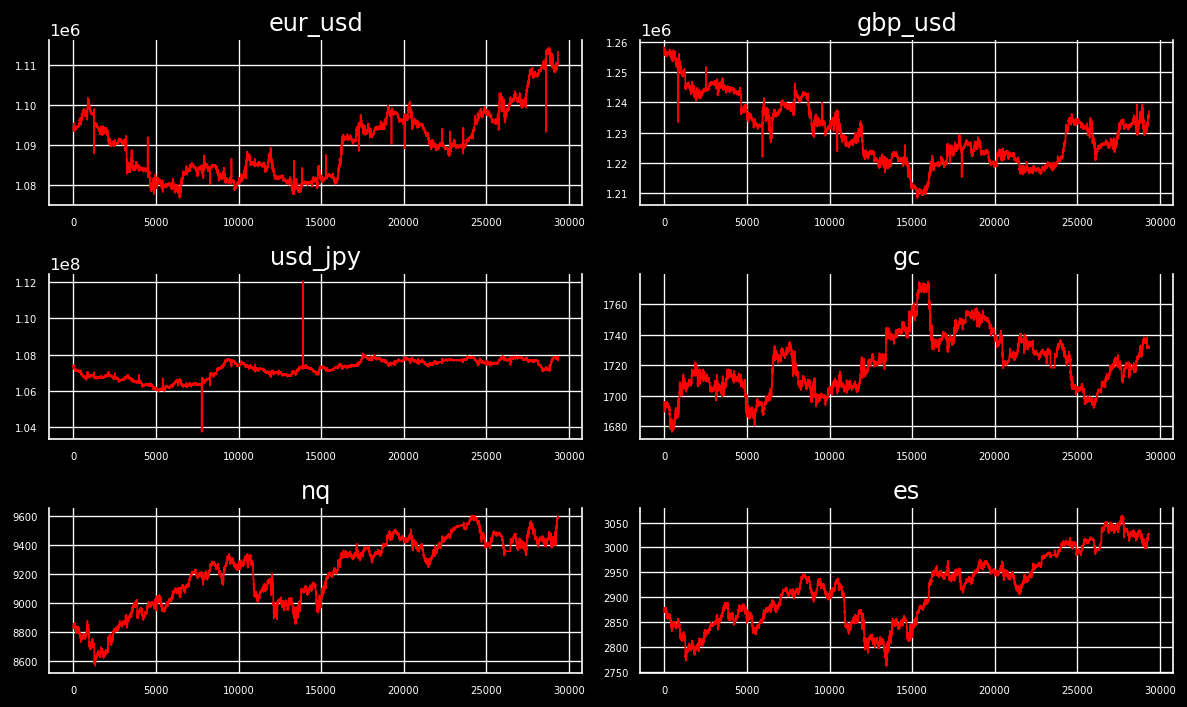

In [70]:
# Plot
plt.style.use('dark_background')
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
    dataset = data[data.columns[i]]
    ax.plot(dataset, color='red', linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines['top'].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout();

In [86]:
nobs = 30
X = data[:15000]
train_ecm, test_ecm = X[0:-nobs], X[-nobs:]

# Check size
print(train_ecm.shape)  
print(test_ecm.shape)

(14970, 6)
(30, 6)


In [87]:
# VECM select appropriate lag orders

from statsmodels.tsa.vector_ar import vecm

model = vecm.select_order(train_ecm, maxlags=15)
print(model.summary())

 VECM Order Selection (* highlights the minimums) 
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        45.14       45.16   4.019e+19       45.15
1        44.95       44.99   3.309e+19       44.96
2        44.87       44.93   3.080e+19       44.89
3        44.86       44.94   3.050e+19       44.89
4        44.86       44.95   3.027e+19       44.89
5        44.86       44.97   3.027e+19       44.89
6        44.86       44.99   3.023e+19       44.90
7        44.85       45.00   3.021e+19       44.90
8        44.85       45.02   3.020e+19       44.91
9        44.86       45.04   3.027e+19       44.92
10       44.72      44.92*   2.639e+19       44.79
11       44.71       44.93   2.619e+19      44.79*
12      44.71*       44.95  2.604e+19*       44.79
13       44.71       44.97   2.608e+19       44.79
14       44.71       44.99   2.611e+19       44.80
15       44.71       45.00   2.609e+19       44.81
-------------------------------

In [84]:
from statsmodels.tsa.vector_ar.vecm import VECM, select_order

In [95]:
vec_rank1 = select_coint_rank(train_ecm, det_order = 1, k_ar_diff = 12,
                                   method = 'trace', signif=0.01)
print(vec_rank1.summary())

Johansen cointegration test using trace test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   6          148.6          117.0
  1   6          75.25          87.77
-------------------------------------


- first column in the table shows the rank which is the number of cointegrating relationships for the dataset, while the second reports the number of equations in total. 
- λtrace statistics in the third column, together with the corresponding critical values. 
- first row of the table tests the null hypothesis of at most one cointegrating vector, against the alternative hypothesis that the number of cointegrating equations is strictly larger than the number assumed under the null hypothesis, i.e., larger than one. 
- test statistic of 141.3 considerably exceeds the critical value (117.0) and so the null of at most one cointegrating vector is rejected. 
- test statistic (76.72) do not exceeds the critical value so that the null of at most two cointegrating vectors cannot be rejected at the 1% level

Maximum-eigenvalue statistic assumes a given number of r cointegrating relations under the null hypothesis and tests this against the alternative that there are r + 1 cointegrating equations.

In [96]:
vec_rank2 = select_coint_rank(train_ecm, det_order = 1, k_ar_diff = 12, method = 'maxeig', signif=0.01)
print(vec_rank2.summary())

Johansen cointegration test using maximum eigenvalue test statistic with 1% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   1          73.33          49.41
  1   2          31.03          42.86
-------------------------------------


In [97]:
# VECM
vecm = VECM(train_ecm, k_ar_diff=12,coint_rank=5,deterministic='co')
vecm_fit = vecm.fit()
print(vecm_fit.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation eur_usd
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         911.1464   1089.977      0.836      0.403   -1225.169    3047.461
L1.eur_usd     -0.3235      0.009    -36.315      0.000      -0.341      -0.306
L1.gbp_usd      0.0144      0.006      2.484      0.013       0.003       0.026
L1.usd_jpy  -9.501e-05   3.21e-05     -2.962      0.003      -0.000   -3.21e-05
L1.gc          16.3086      3.618      4.508      0.000       9.218      23.399
L1.nq           3.2518      1.140      2.854      0.004       1.018       5.485
L1.es          -4.8767      3.728     -1.308      0.191     -12.183       2.430
L2.eur_usd     -0.2332      0.009    -24.739      0.000      -0.252      -0.215
L2.gbp_usd      0.0310      0.006      4.944      0.000       0.019       0.043
L2.usd_jpy   3.155e-05   3.23e-05

In [ ]:
!pip install chowtest
from chow_test import chowtest

In [92]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import CointRankResults

## Co-integration
-  here, we will test long-run equilibrium and measure using co-integration.

Let us write first to clear the concept of co-integration occuring:
- it occurs in two or more nonstationary time series
- having a long-run equilibrium
- moving together in such a way that their linear combination results in a stationary time series
- sharing an underlying common stochastic trend.

Let us write the mathematics and put in context with our time-series here:
### Mathematics of Cointegration

Yt is composed on 6 time-series:
1. y1 = y11, y12, y13.....y1t
2. y2 = y21, y22, y23....y2t
3. y3 = y31, y32, y33.....y3t
4. y4 = y41, y42, y43......y4t
5. y5 = y51, y52,y53......y5t
6. y6 = y61, y62, y63.....,y6t

We have seen earlier that all our 6 series are nonstationary time series.

Cointegration implies that time series will be connecting through an error correction model. The error correction model is important in time series analysis because it allows us to better understand long-run dynamics. 

### Error correction model:

- shows the long-run equilibrium relationships of variables.
- includes a short-run dynamic adjustment mechanism that describes how variables adjust when they are out of equilibrium.
- uses adjustment coefficients to measure the forces that push the relationship towards long-run equilibrium.

In [76]:
rank1 = select_coint_rank(train_ecm, det_order = 1, k_ar_diff = 8,
                                   method = 'trace', signif=0.05)
print(rank1.summary())

NameError: name 'select_coint_rank' is not defined

- The first column (r_0) shows the rank of the VECM that has been tested which in other words the number of cointegrating relationships.
- The 2nd column (r_1) reports the number of equations in total.
- The 3rd column shows the trace statistics and
- the 4th column shows the corresponding critical value

The row tests the null hypothesis of at most one cointegrating vector, against the alternative hypothesis that the number of cointegrating equations is strictly larger than the number assumed under null hypothesis, i.e. larger than one. λ trace statistics in the third column, together with the corresponding critical values.

The test statistic (45.28) < critical values (55.25) and so the null of cointegraing vector cannot be rejected and this applicable to all det-orderint

  - (-1): no deterministic terms
  - (0): constant term
  - (1): linear trend

In contrast to trace statistics, the maximum eigen value statistics assumes a given number of r, there are r+1 cointegrating equations.

The first column in the table shows the rank of the VECM that has been tested or, in other words, the number of cointegrating relationships for the set of interest rates, while the second reports the number of equations in total.

In [ ]:
rank2 = select_coint_rank(train_ecm, det_order=1, k_ar_diff = 8,
                                  method = 'maxeig', signif=0.05)
print(rank2.summary())

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import VECM, select_order

vecm = VECM(endog = train_ecm, k_ar_diff = 8, coint_rank = 1, deterministic = 'cili')

"""estimates the VECM on the prices with 8 lags, 5 cointegrating relationship, and 
a constant within the cointegration relationship"""

vecm_fit = vecm.fit()
vecm_fit.summary()

## Checking residual auto-correlation

In [98]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(vecm_fit.resid)

for col, val in zip(train.columns, out):
    print((col), ':', round(val, 2))

eur_usd : 2.0
gbp_usd : 2.0
usd_jpy : 2.0
gc : 2.0
nq : 2.0
es : 2.0


## Impact of changes in one variable on the others at different horizons:

### Impulse Response Analysis
IRAs the estimated responses to a unit impulse in one of the variables. They are computed in practice using the MA(\infty) representation of the VAR(p) process:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

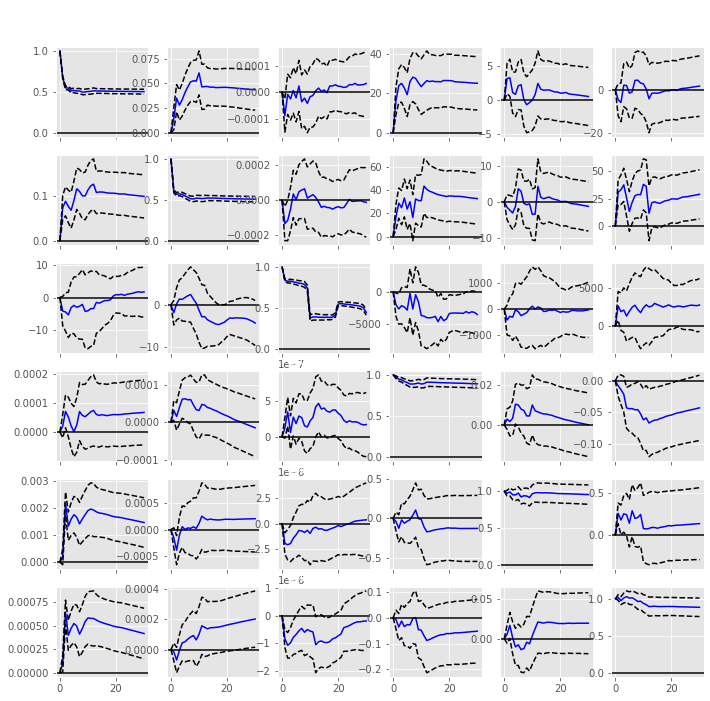

In [99]:
# stores and prints the impulse response functions
plt.style.use('ggplot')
irf = vecm_fit.irf(30)
irf.plot(orth = False)
plt.show()

#### Objectives: 
- how variable x effects variable y
- when the maximum impact is experienced
- how long the effect lasts

One standard deviation shock/increase to x causes significant increases (decreases) in y (impulse variable) for m periods (determined by the length of period for which the SE bands are above 0 or below 0 in case of decrease) after which the effect dissipates. The increase peaks in period k. 

Each of the IRF graphs tells us how a shock to one variable affects another (or the same) variable.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

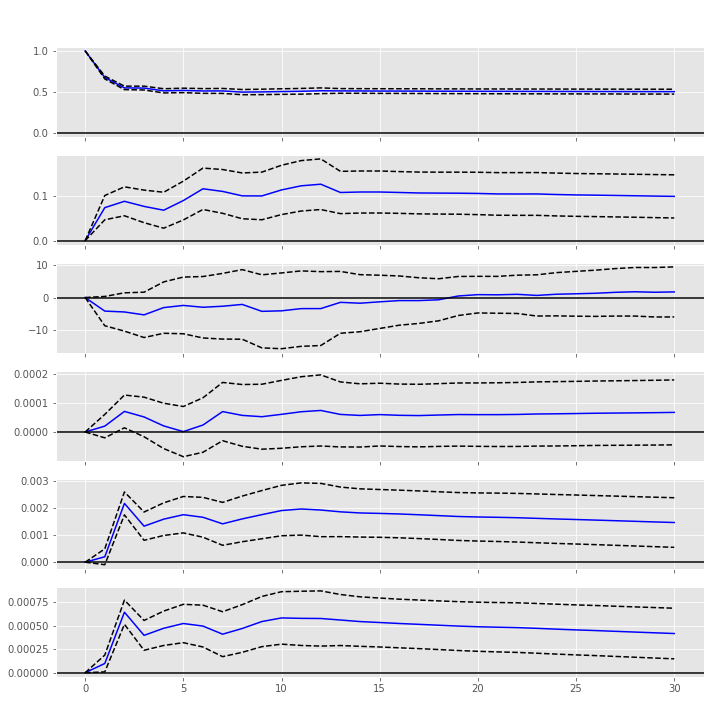

In [100]:
plt.style.use('ggplot')
irf.plot(impulse='eur_usd')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

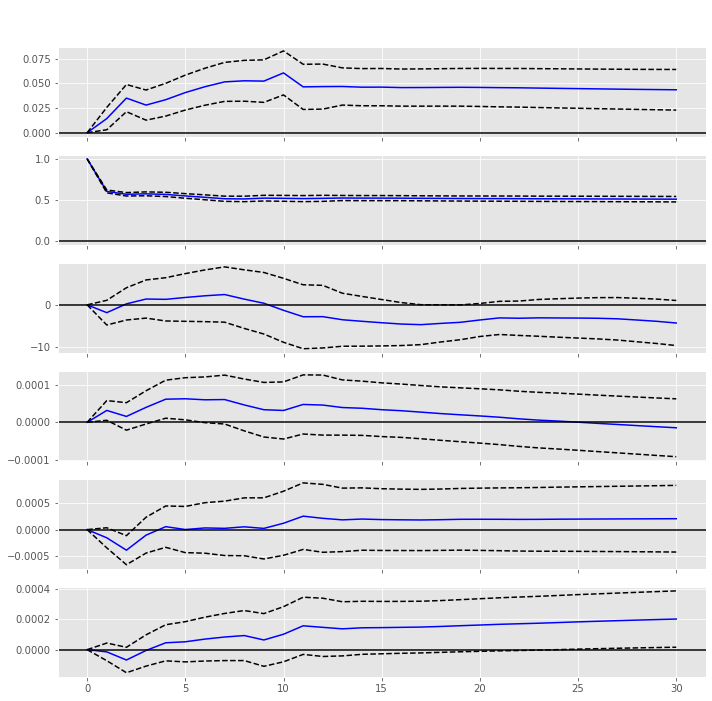

In [101]:
plt.style.use('ggplot')
irf.plot(impulse='gbp_usd')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

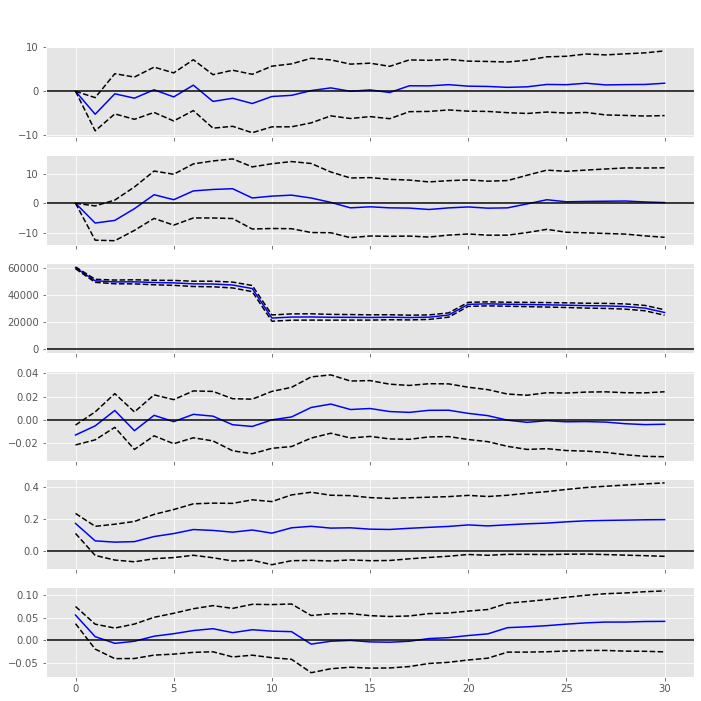

In [102]:
plt.style.use('ggplot')
irf.plot(impulse='usd_jpy', orth = True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

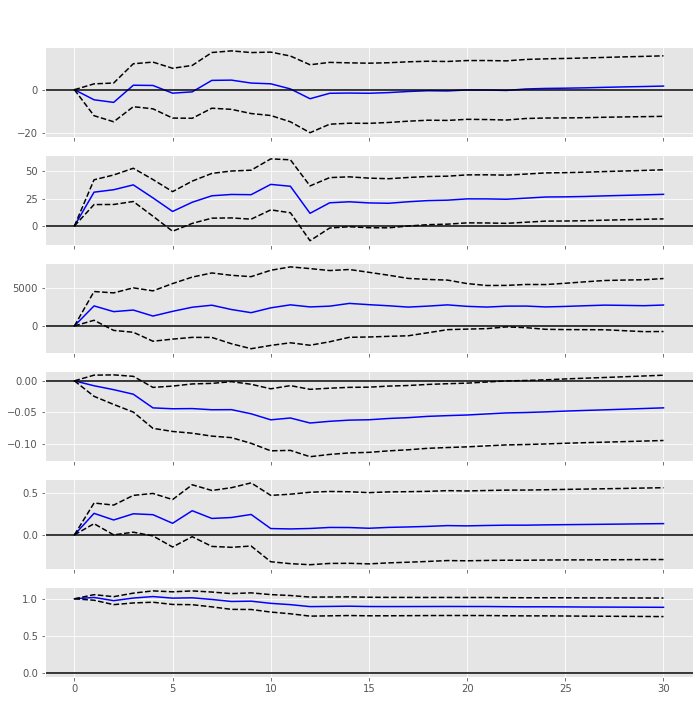

In [103]:
plt.style.use('ggplot')
irf.plot(impulse='es')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

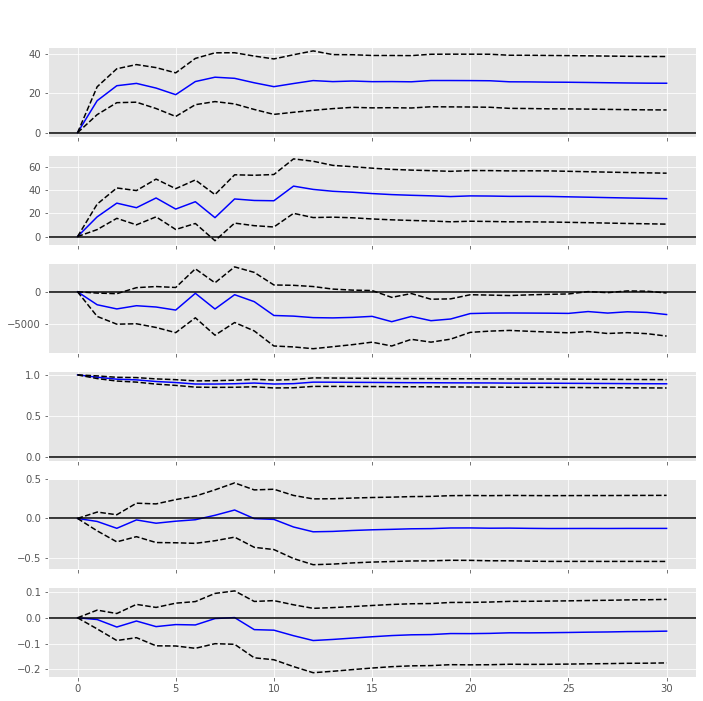

In [104]:
plt.style.use('ggplot')
irf.plot(impulse='gc')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

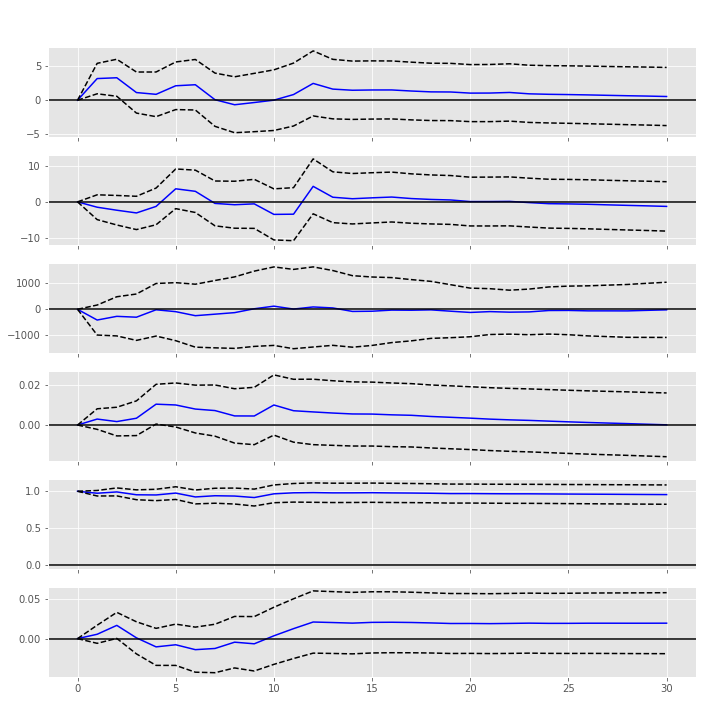

In [105]:
plt.style.use('ggplot')
irf.plot(impulse='nq')
plt.show()

In [106]:
eg = vecm_fit.test_granger_causality(caused="eur_usd", causing="gbp_usd")
eg.summary()

Test statistic,Critical value,p-value,df
3.477,1.720,0.000,"(13, 89226)"


In [107]:
je = vecm_fit.test_granger_causality(caused="usd_jpy", causing="eur_usd")
je.summary()

Test statistic,Critical value,p-value,df
0.5140,1.720,0.918,"(13, 89226)"


In [108]:
jnq = vecm_fit.test_granger_causality(caused="usd_jpy", causing="nq")
jnq.summary()

Test statistic,Critical value,p-value,df
0.3430,1.720,0.985,"(13, 89226)"


In [109]:
jes = vecm_fit.test_granger_causality(caused="usd_jpy", causing="es")
jes.summary()

Test statistic,Critical value,p-value,df
0.9851,1.720,0.463,"(13, 89226)"


In [110]:
vecm_fit.predict(steps=nobs)

array([[1.08164908e+06, 1.21230811e+06, 1.07333334e+08, 1.75346609e+03,
        8.98786600e+03, 2.82627985e+03],
       [1.08169663e+06, 1.21231081e+06, 1.07327914e+08, 1.75350513e+03,
        8.98718817e+03, 2.82604112e+03],
       [1.08173175e+06, 1.21233965e+06, 1.07327712e+08, 1.75352826e+03,
        8.98723780e+03, 2.82595821e+03],
       [1.08173856e+06, 1.21232579e+06, 1.07323865e+08, 1.75357350e+03,
        8.98718987e+03, 2.82585801e+03],
       [1.08172764e+06, 1.21233686e+06, 1.07330119e+08, 1.75368719e+03,
        8.98671542e+03, 2.82567759e+03],
       [1.08171847e+06, 1.21236905e+06, 1.07331092e+08, 1.75372556e+03,
        8.98677063e+03, 2.82560870e+03],
       [1.08173712e+06, 1.21236546e+06, 1.07330519e+08, 1.75370825e+03,
        8.98652144e+03, 2.82551889e+03],
       [1.08175894e+06, 1.21240282e+06, 1.07337862e+08, 1.75379987e+03,
        8.98646814e+03, 2.82545988e+03],
       [1.08175243e+06, 1.21237544e+06, 1.07333292e+08, 1.75386760e+03,
        8.98657959e+03, 

In [111]:
forecast, lower, upper = vecm_fit.predict(nobs, 0.05)
print("lower bounds of confidence intervals:")
print(lower.round(6))
print("\npoint forecasts:")
print(forecast.round(6))
print("\nupper bounds of confidence intervals:")
print(upper.round(6))

lower bounds of confidence intervals:
[[1.08119073e+06 1.21159567e+06 1.07215455e+08 1.75240779e+03
  8.98014526e+03 2.82392614e+03]
 [1.08113892e+06 1.21146196e+06 1.07173904e+08 1.75202620e+03
  8.97604253e+03 2.82265544e+03]
 [1.08111324e+06 1.21138273e+06 1.07145445e+08 1.75173987e+03
  8.97347595e+03 2.82178886e+03]
 [1.08106582e+06 1.21127094e+06 1.07117128e+08 1.75152546e+03
  8.97130765e+03 2.82104743e+03]
 [1.08100989e+06 1.21119620e+06 1.07101945e+08 1.75141722e+03
  8.96896806e+03 2.82031174e+03]
 [1.08095694e+06 1.21115159e+06 1.07083536e+08 1.75125952e+03
  8.96734248e+03 2.81975010e+03]
 [1.08093393e+06 1.21107574e+06 1.07065516e+08 1.75106802e+03
  8.96557657e+03 2.81921758e+03]
 [1.08091549e+06 1.21105086e+06 1.07056539e+08 1.75099564e+03
  8.96413675e+03 2.81875951e+03]
 [1.08087259e+06 1.21096403e+06 1.07037031e+08 1.75090876e+03
  8.96293567e+03 2.81833206e+03]
 [1.08083659e+06 1.21089197e+06 1.07023765e+08 1.75075588e+03
  8.96163998e+03 2.81791040e+03]
 [1.08079815

In [112]:
forecast = DataFrame(forecast, index= test_ecm.index, columns= test_ecm.columns)
forecast.rename(columns = {'eur_usd':'eur_usd_pred', 'gbp_usd':'gbp_usd_pred', 'usd_jpy':'usd_jpy_pred',
                    'gc':'gc_pred', 'nq':'nq_pred', 'es':'es_pred'}, inplace = True)
forecast

,eur_usd_pred,gbp_usd_pred,usd_jpy_pred,gc_pred,nq_pred,es_pred
14970,1.081649e+06,1.212308e+06,1.073333e+08,1753.466090,8987.866002,2826.279847
14971,1.081697e+06,1.212311e+06,1.073279e+08,1753.505133,8987.188165,2826.041123
14972,1.081732e+06,1.212340e+06,1.073277e+08,1753.528256,8987.237801,2825.958214
14973,1.081739e+06,1.212326e+06,1.073239e+08,1753.573500,8987.189868,2825.858010
14974,1.081728e+06,1.212337e+06,1.073301e+08,1753.687186,8986.715416,2825.677591
14975,1.081718e+06,1.212369e+06,1.073311e+08,1753.725558,8986.770628,2825.608702
14976,1.081737e+06,1.212365e+06,1.073305e+08,1753.708249,8986.521443,2825.518891
14977,1.081759e+06,1.212403e+06,1.073379e+08,1753.799870,8986.468143,2825.459879
14978,1.081752e+06,1.212375e+06,1.073333e+08,1753.867605,8986.579593,2825.408248
14979,1.081751e+06,1.212362e+06,1.073328e+08,1753.863570,8986.498602,2825.340229


In [113]:
combine = concat([test_ecm, forecast], axis=1)
predict = combine[['eur_usd', 'eur_usd_pred', 'gbp_usd', 'gbp_usd_pred', 'usd_jpy', 
                   'usd_jpy_pred', 'gc', 'gc_pred', 'nq', 'nq_pred', 'es', 'es_pred']]
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

predict.style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['eur_usd_pred', 'gbp_usd_pred', 'usd_jpy_pred',
                                                               'gc_pred', 'nq_pred', 'es_pred']])

<IPython.core.display.Javascript object>

,eur_usd,eur_usd_pred,gbp_usd,gbp_usd_pred,usd_jpy,usd_jpy_pred,gc,gc_pred,nq,nq_pred,es,es_pred
14970,1081185.000000,1081649.075965,1211965.000000,1212308.112792,107338000.000000,107333333.751150,1753.200000,1753.466090,8988.000000,8987.866002,2826.875000,2826.279847
14971,1081195.000000,1081696.629939,1212060.000000,1212310.809623,107327000.000000,107327914.231548,1753.000000,1753.505133,8983.375000,8987.188165,2824.875000,2826.041123
14972,1081335.000000,1081731.754223,1212465.000000,1212339.648322,107314500.000000,107327712.407169,1753.550000,1753.528256,8979.250000,8987.237801,2823.125000,2825.958214
14973,1081445.000000,1081738.563608,1212950.000000,1212325.790738,107302000.000000,107323864.703464,1753.550000,1753.573500,8987.000000,8987.189868,2825.875000,2825.858010
14974,1081685.000000,1081727.644095,1213305.000000,1212336.858955,107277500.000000,107330119.154864,1753.750000,1753.687186,8987.625000,8986.715416,2825.625000,2825.677591
14975,1081835.000000,1081718.472688,1213460.000000,1212369.046598,107274000.000000,107331092.112743,1753.400000,1753.725558,8991.500000,8986.770628,2827.375000,2825.608702
14976,1081935.000000,1081737.115334,1213460.000000,1212365.456324,107267500.000000,107330518.652301,1754.150000,1753.708249,8990.750000,8986.521443,2826.625000,2825.518891
14977,1081885.000000,1081758.937073,1213405.000000,1212402.820907,107268000.000000,107337862.284866,1754.650000,1753.799870,8990.000000,8986.468143,2825.875000,2825.459879
14978,1081885.000000,1081752.433823,1213305.000000,1212375.441022,107281000.000000,107333291.724346,1754.150000,1753.867605,8987.250000,8986.579593,2824.375000,2825.408248
14979,1081785.000000,1081751.499281,1213160.000000,1212362.317942,107281000.000000,107332763.421684,1754.600000,1753.863570,8982.375000,8986.498602,2823.375000,2825.340229


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

mae = mean_absolute_error(test_ecm['eur_usd'], forecast['eur_usd_pred'])
print('EURUSD MAE: %f' % mae)

mse = mean_squared_error(test_ecm['eur_usd'], forecast['eur_usd_pred'])
print('EURUSD MSE: %f' % mse)

rmse = sqrt(mse)
print('EURUSD RMSE: %f' % rmse)

mape = np.mean(np.abs(forecast['eur_usd_pred'] - test_ecm['eur_usd'])/ np.abs(test_ecm['eur_usd']))
print('EURUSD MAPE:', mape)

EURUSD MAE: 260.828710
EURUSD MSE: 85580.280578
EURUSD RMSE: 292.541075


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EURUSD MAPE: 0.0002411742971866569


# VARMA:

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# time-series evaluation function, as shown here:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true,y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true,y_pred)}')

In [ ]:
# ADF test function to check for stationary data

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column:{column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
           dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
           print("Conclusion:====>")
           print("Reject the null hypothesis")
           print("Data is stationary")
    else:
           print("Conclusion:====>")
           print("Fail to reject the null hypothesis")
           print("Data is non-stationary")
           
for name, column in data[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']].iteritems():
           Augmented_Dickey_Fuller_Test_func(df[name],name)
           print('\n')

In [ ]:
nobs = 15
X = data[:15000]
train_varma, test_varma = X[0:-nobs], X[-nobs:]

# Check size
print(train_varma.shape)  
print(test_varma.shape)

In [ ]:
# Make the data stationary by using Pandas differencing.
train_diff = train_varma.diff()
train_diff.dropna(inplace = True)

# Check whether the variables are stationary after first differencing.
for name, column in train_diff[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

In [ ]:
# cointegraion test

from statsmodels.tsa.vector_ar.vecm import coint_johansen
def cointegration_test(df):
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6):
        return str(val).ljust(length)
    print('Column Name > Test Stat > C(95%) => Signif \n','--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">",adjust(cvt, 8), ' => ' , trace > cvt)

cointegration_test(train_diff[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']])

In [ ]:
# inverse differencing function.
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns:
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import ParameterGrid

"""
Let’s define a parameter grid for selecting p, q, and trend.
"""
param_grid = {'p': [1,2,3], 'q':[1,2,3], 'tr': ['n','c','t','ct']}
pg = list(ParameterGrid(param_grid))
pg

In [ ]:
"""
TIME EXPENSIVE PROCESS

Evaluating all possible combinations of p, q, and trend, and storing the results in a df_results_moni DataFrame for further
reference
"""
df_results_moni = pd.DataFrame(columns=['p', 'q', 'tr','RMSE_EURUSD','RMSE_GBPUSD','RMSE_USDJPY',
                                        'RMSE_GC', 'RMSE_NQ', 'RMSE_ES'])
print('starting grid search')
start = timer()
for a,b in enumerate(pg):
    p = b.get('p')
    q = b.get('q')
    tr = b.get('tr')
    model = VARMAX(train_diff, order=(p,q), trend=tr).fit()
    z = model.forecast(y=train_diff[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']].values, steps=30)
    df_pred = pd.DataFrame(z, columns=['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es'])
    res = inverse_diff(df[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']],df_pred)
    eur_usd_rmse = np.sqrt(metrics.mean_squared_error(test.eur_usd, res.eur_usd_1st_inv_diff))
    gbp_usd_rmse = np.sqrt(metrics.mean_squared_error(test.gbp_usd, res.gbp_usd_1st_inv_diff))
    usd_jpy_rmse = np.sqrt(metrics.mean_squared_error(test.usd_jpy, res.usd_jpy_1st_inv_diff))
    gc_rmse = np.sqrt(metrics.mean_squared_error(test.gc, res.gc_1st_inv_diff))
    nq_rmse = np.sqrt(metrics.mean_squared_error(test.nq, res.nq_1st_inv_diff))
    es_rmse = np.sqrt(metrics.mean_squared_error(test.es, res.es_1st_inv_diff))
    df_results_moni = df_results_moni.append({'p': p, 'q': q,'tr': tr,'RMSE_EURUSD': eur_usd_rmse,
                                              'RMSE_GBPUSD':gbp_usd_rmse,'RMSE_USDJPY':usd_jpy_rmse,
                                              'RMSE_GC':gc_rmse,'RMSE_NQ': nq_rmse, 
                                              'RMSE_ES': es_rmse}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds:{(end - start)}')

In [ ]:
df_results_moni.sort_values(by = ['RMSE_EURUSD','RMSE_GBPUSD','RMSE_USDJPY',
                                        'RMSE_GC', 'RMSE_NQ', 'RMSE_ES'] )

In [ ]:
varmax_model = VARMAX(train_diff[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']],
               order=(1,2),trends = 'n').fit( disp=False)
result = varmax_model.forecast(steps = 15)

varmax_res = inverse_diff(train[['eur_usd', 'gbp_usd', 'usd_jpy','gc', 'nq', 'es']], result)
varmax_res